# Data Mining & Machine Learning 
# Part 1: Naive Bayes

## 1. Choice of Data

The dataset used in this coursework is an image dataset of American Sign Language (ASL) hand gestures. Creating an ML model for correctly classifying ASL gestures is the first step towards inclusion and improved accessability of services (human-to-human interactions) for people with speech and hearing impairments. ASL datasets are a staple in ML similar to MINST, meaning large datasets with preprocessed images are freely available, yet are bit more complex than MINST thus offering a good gateway into data mining and machine learning with an image dataset that is still challenging.

To challenge myself a bit further, I've combined 3 separate datasets with the intention of creating a larger, more varied dataset and thus a more robust model. In addition, images in the dataset feature each letter in different orientations and backgrounds, lighting conditions and zoom levels further diversifying the dataset, with 4000 images per letter (originally). 
Considering the computational strain of processing a dataset of 26 letters, I've reduced the number of classes to the first 10 letters of the alphabet (i.e., A - J) and further reduced the number of instances used to 270 per class.

**References** <br>
Dataset 1: https://www.kaggle.com/grassknoted/asl-alphabet <br>
Dataset 2: https://www.kaggle.com/ayuraj/asl-dataset <br>
Dataset 3: https://www.kaggle.com/kapillondhe/american-sign-language <br>
<br>
Image Import: https://www.freecodecamp.org/news/demystifying-gradient-descent-and-backpropagation-via-logistic-regression-based-image-classification-9b5526c2ed46/ <br>
Image Processing: https://www.oreilly.com/library/view/programming-computer-vision/9781449341916/ch01.html <br>
Releif Algorithm: https://medium.com/@yashdagli98/feature-selection-using-relief-algorithms-with-python-example-3c2006e18f83 <br>
Bayes Classifier: https://towardsdatascience.com/naive-bayes-classifier-how-to-successfully-use-it-in-python-ecf76a995069


## 2. Data Preparation 

**Before import:**
1. Normalising file names in the format x.1.jpg where 'x' represents the letter in the image.
2. Normalising file formats (files come in the form jpeg and jpg, transform all to jpg). 

To achieve this I selected all images and used Mac's Rename All function and Find & Replace to normalise file formats.

**After import:**
1. Normalise in size (reduce features to 100 by 100 px). 
2. Convert to grayscale to further downsize the number of features. 
3. Convert to 1D arrays for ease of use.
4. Before combining the datasets perform required pre-processing (e.g., colour normalisation for dataset 2).
5. Pre-process the combined dataset (where the same pre-processing techniques are required for all images).

**Step 1:** Import the libraries to be used.

In [2]:
import sys
import sklearn 
import os
import tarfile
import urllib
import random
import numpy as np
import pandas as pd
import cv2 # image resizing 

import seaborn as sn
from PIL import Image
from os import listdir
from imageio import imread
from ReliefF import ReliefF # attribute selection algorithm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile, chi2, f_classif
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [2]:
# for plotting figures/ data visualisation 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

**Step 2:** Get the data. 

In [50]:
# saved in the same directory as the Jupyter notebook
ds1 = os.listdir('original1')
ds2 = os.listdir('original2')
ds3 = os.listdir('original3')
ds1.remove(".DS_Store") # folder meta-data file inlcuded in Mac OS folders by defualt 
ds2.remove(".DS_Store")
ds3.remove(".DS_Store")

**Step 3:** Check is files are in the correct format.
Code reference: https://stackoverflow.com/questions/54379176/valueerror-could-not-find-a-format-to-read-the-specified-file-in-mode-i

In [51]:
def verify_format(dir_path):
    for filename in listdir(dir_path):
        if filename.endswith('.jpg'):
            try:
                img = Image.open(dir_path+"/"+filename) # open the image file
                img.verify() # verify that it is, in fact an image
            except (IOError, SyntaxError) as e:
                print('Bad file:', filename)

In [52]:
verify_format('original1')
verify_format('original2')
verify_format('original3')

**Step 4:** Resize the images to fit the same dimensions and turn gray-scale <br>
What make things slightly easier is the fact that the aspect ratio for all images is the same, i.e., 1:1

In [53]:
def gray_resize(input_path, output_path, data):
    for im in data:
        image = Image.open(input_path + im)
        resized = image.resize((25,25))
        gray = resized.convert('L')# convert to grayscale to reduce noise
        gray.save(output_path + im) # save the resized images in the 'resized' directory

In [54]:
# ds1.remove(".DS_Store")
gray_resize('original1/','resized1/', ds1)

In [55]:
# ds2.remove('.DS_Store')
gray_resize('original2/','resized2/', ds2)
gray_resize('original3/','resized3/', ds3)

In [56]:
# repeat Step 2 with the resized images
ds1 = os.listdir("resized1")
ds2 = os.listdir("resized2")
ds3 = os.listdir("resized3")

#data_resized.remove(".DS_Store")

**Step 5:** Convert image files to numpy arrays

In [57]:
def to_array(train, labels, data, path):
    for i, im in enumerate(data):
        filename = path + im    
        image = np.asarray(imread(filename), dtype=None) # convert the image to an array
        train.append(image) 
        labels.append(0 if im.split(".")[0] == "a" # labels are determined by the name of the image
                      else 1 if im.split(".")[0] == "b" 
                      else 2 if im.split(".")[0] == "c" 
                      else 3 if im.split(".")[0] == "d" 
                      else 4 if im.split(".")[0] == "e" 
                      else 5 if im.split(".")[0] == "f" 
                      else 6 if im.split(".")[0] == "g" 
                      else 7 if im.split(".")[0] == "h" 
                      else 8 if im.split(".")[0] == "i" 
                      else 9)

In [58]:
labels1, labels2, labels3, train1, train2, train3 = [], [], [], [], [], []

ds1.remove(".DS_Store")
ds2.remove(".DS_Store")
ds3.remove(".DS_Store")

to_array(train1, labels1, ds1, 'resized1/')
to_array(train2, labels2, ds2, 'resized2/')
to_array(train3, labels3, ds3, 'resized3/')

In [59]:
# for easy tranlation between a label of an image and it menaing 
key = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'] 

In [60]:
# check the dimensions of random images in the training set (all should be the same size after resizing)
train3[0].shape

(25, 25)

**Step 6:** Flatten the 3D training dataset into a 2D array

In [61]:
train1 = np.array(train1)
train2 = np.array(train2)
train3 = np.array(train3)
train1 = train1.reshape(len(train1), 25*25)
train2 = train2.reshape(len(train2), 25*25)
train3 = train3.reshape(len(train3), 25*25)

In [62]:
train1.shape

(1010, 625)

## 3. Data Exploration

**Step 1.** Check for even distribution of instances across the classes.

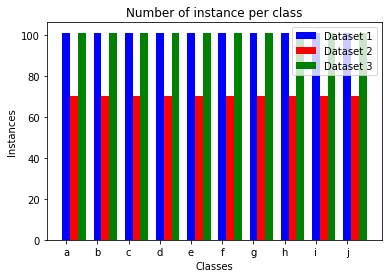

In [63]:
df1 = pd.DataFrame(data=labels1, index=None, columns=["Classes"])
x1 = df1.value_counts()
df2 = pd.DataFrame(data=labels2, index=None, columns=["Classes"])
x2 = df2.value_counts()
df3 = pd.DataFrame(data=labels3, index=None, columns=["Classes"])
x3 = df3.value_counts()


y_pos = np.arange(len(key))
legend = ['Dataset 1', 'Dataset 2', 'Dataset 3']
plt.title("Number of instance per class")
plt.xlabel("Classes")
plt.ylabel("Instances")
plt.bar(y_pos + 0.00, x1, color = 'b', width = 0.25)
plt.bar(y_pos + 0.25, x2, color = 'r', width = 0.25)
plt.bar(y_pos + 0.50, x3, color = 'g', width = 0.25)
plt.xticks(y_pos, key)
plt.legend(legend, loc='best')
plt.show()

**Step 2.** Visualise a single random image from the dataset to verify the data have been imported and prepped correctly.

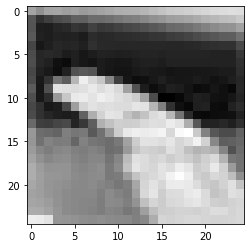

The letter shown - h


In [64]:
rand = random.randint(0,len(train1)) # generate a random index 
some_digit = train1[rand] # pick a random image from the dataset
some_digit_image = some_digit.reshape(25, 25)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.show()
print("The letter shown - " + key[labels1[rand]])

The function to visualise a single digit (used later on).

In [65]:
def plot_digit(data):
    image = data.reshape(25, 25)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

**Step 3.** Visualise images from the three datasets.

In [66]:
def plot_digits(instances, images_per_row=10, **options):
    size = 25
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    #plt.xlabel(labels)
    plt.axis("off")

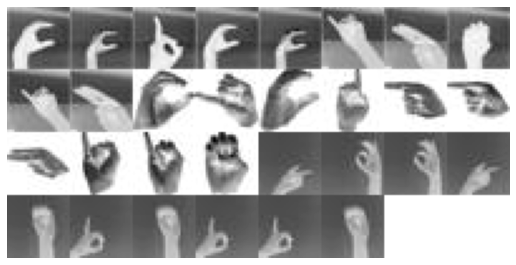

In [67]:
plt.figure(figsize=(9,9))
example_images = np.concatenate((train1[:10], train2[:10], train3[:10]), axis = 0)
plot_digits(example_images, images_per_row=8)
plt.show()

Evident that for the second dataset colour scheme is opposite to that of other datasets (i.e., dark hand, light background vs light hand, dark background. To prevent the canceling effect, flip the colour scheme of the images in the second dataset.

**Step 4.** Flip the colour scheme of the second dataset.

In [68]:
rgb = np.full((len(train2),len(train2[0])), 255)
# reverse the colour scheme by subtracting each pixel value from 255
train2 = np.subtract(rgb,train2) 

Double check the colour scheme has been inverted for the correct training set.

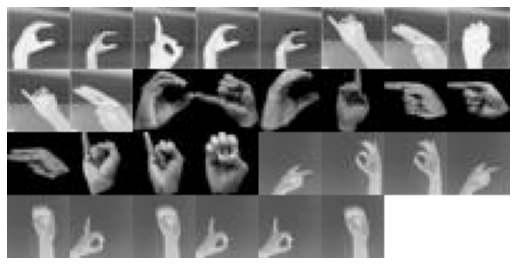

In [69]:
plt.figure(figsize=(9,9))
example_images = np.concatenate((train1[:10], train2[:10], train3[:10]), axis = 0)
#x_label = labels[:48]
plot_digits(example_images, images_per_row=8)
plt.show()

**Step 5.** Add the three training datasets together.

In [70]:
labels = np.concatenate((labels1, labels2, labels3), axis=0)
train = np.concatenate((train1, train2, train3), axis=0)

### Image Average 

Filter the indexes of the target class, use the indexes to find the average of the target class. 

In [71]:
# target - class to be filtered out
def averaged(target_label, labels, dataset):
    target = []
   
    for i in range(len(labels)):
        if labels[i] == target_label:
            target.append(i)
    average = target[0]
    for nr in range(1, len(target)):
        try:
            average += train[target[nr]]
        except:
            print("skipped..." + train[i])
    return average / len(target)


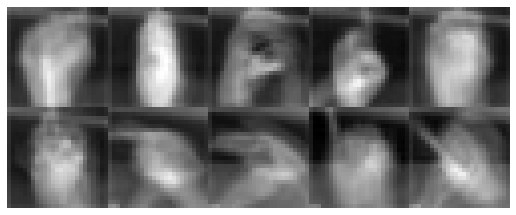

In [72]:
average = []
for i in range(len(key)):
    average.append(averaged(i, labels, train))

plt.figure(figsize=(9,9))
example_images = average
plot_digits(example_images, images_per_row=5)
plt.show()
    

Possible to distinguish between the different classes, evident that for some classes images were taken from different angles (e.g., front, left side, right side)/ using opposite hands. If classification accuracy for particular classes is especially low, the variance in images could be a potential explanation.

## 4. Data Processing for ML

### 4.1. Data Normalisation

To reduce the values to a 0 -1 scale, each pixel value has been divided by 255. This does not 'change' the image in any way, however the smaller values allow to process them and run the model quicker. <br>

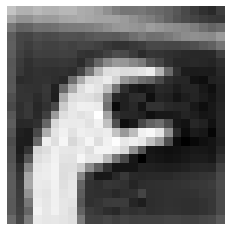

In [73]:
normal = train / 255
plot_digit(normal[0]) # check the gestures are still distinguishable in the image

### 4.2. Gaussian Image Processing 

Gaussian image processing is a technique  blur the images and thus reduce the noise.

In [74]:
blur = []
for i in range(len(normal)):
    blur.append(cv2.GaussianBlur(normal[i], (5, 5), 0))  

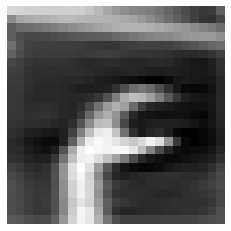

In [75]:
plot_digit(blur[200]) # check it worked

### 4.3. Attribute Selection

**Correlation Based Ranking** 

A filter based attribute selection method. <br>
Calculate Pearson's r - find attributes that correlate with the class attribute but do not correlate among themselves. <br>

1. **Full dataset correlations**

In [76]:
blur = np.array(blur)
blur = np.reshape(blur, (blur.shape[0], blur.shape[1]))
full_corr = pd.DataFrame(blur) # easier to work with a dataframe 
full_corr["class"] = labels

In [77]:
full_corr.head()

0         1         2         3         4         5         6  \
0  0.217647  0.224020  0.230882  0.230392  0.230882  0.230637  0.227696   
1  0.224020  0.228431  0.233088  0.233333  0.234314  0.234559  0.232598   
2  0.224020  0.228431  0.233578  0.236029  0.241176  0.246324  0.245833   
3  0.219608  0.225245  0.233824  0.237745  0.237745  0.232843  0.227696   
4  0.219608  0.225980  0.233088  0.233333  0.234559  0.234559  0.230882   

          7         8         9  ...       616       617       618       619  \
0  0.232353  0.248039  0.269853  ...  0.578186  0.576225  0.574265  0.574020   
1  0.234559  0.248529  0.274755  ...  0.586029  0.584069  0.582108  0.581863   
2  0.238971  0.240686  0.271814  ...  0.542157  0.590441  0.590441  0.587990   
3  0.230637  0.244118  0.268873  ...  0.587500  0.584069  0.579412  0.576961   
4  0.233088  0.246324  0.267402  ...  0.587255  0.584559  0.582108  0.581863   

        620       621       622       623       624  class  
0  0.574510  0.572059  0.562745  0.547304  0.538725      2  
1  0.582353  0.579902  0.570588  0.555147  0.546569      2  
2  0.590441  0.591176  0.583333  0.566912  0.557353      3  
3  0.575980  0.573529  0.565686  0.551961  0.544118      2  
4  0.582353  0.579902  0.570833  0.556127  0.548039      2  

[5 rows x 626 columns]

In [78]:
# find pairwise correlation 
corr_matrix = full_corr.corr(method='pearson')

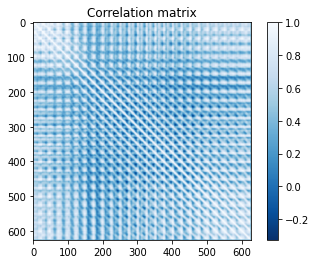

In [79]:
color_map = plt.imshow(corr_matrix)
color_map.set_cmap("Blues_r")
plt.title("Correlation matrix")
plt.colorbar()
plt.show()

Highest correlation along the side pixels and the four edges - makes sense as these are likely to be the background pixels, similar across the dataset. Lowest correlation in the central pixels (i.e., where the gesture would be depicted). <br>

2. **Per class correlation**

In [80]:
abs(corr_matrix["class"]).sort_values()

203      0.000766
13       0.001406
250      0.001437
291      0.002138
202      0.002191
           ...   
86       0.375145
89       0.395695
87       0.398327
88       0.408407
class    1.000000
Name: class, Length: 626, dtype: float64

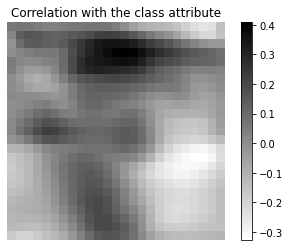

In [81]:
data = np.array(corr_matrix["class"])
plot_digit(data[:625])
plt.colorbar()
plt.title("Correlation with the class attribute")
plt.show()

Good sign - the most highly correlating features with the class attribute are centered around the middle of the image.

**Sk-learn Feature Selection**

In [82]:
sk_train_top50 = SelectPercentile(f_classif, percentile=50).fit_transform(blur,labels)
sk_train_top10 = SelectPercentile(f_classif, percentile=10).fit_transform(blur,labels)
sk_train_top5  = SelectPercentile(f_classif, percentile=5).fit_transform(blur,labels)

## 5. Bayes Classifier 

The Gaussian Naive Bayes classifier is used, as this model is useful for classification problems with normally distributed data.

In [83]:
# Code reference: see Bayes Classifier in references 
def classifier(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    model = GaussianNB()
    
    gnb = model.fit(X_train, y_train)
    
    pred_y = gnb.predict(X_test)
    
    pred_prob = gnb.predict_proba(X_test)
    
    score = gnb.score(X_test, y_test)
    # print('Accuracy Score: ', score)
    # print('')
    # print('CLASSIFICATION REPORT')
    # print(classification_report(y_test, pred_y))
    # plot_confusion_matrix(gnb, X_test, y_test)
    # plt.title('Confusion matrix')
    
    return score, y_test, pred_prob
    

In [84]:
# Collect accuracies of all models
nb_accuracies = pd.DataFrame()

##### 5.1. Full dataset

In [85]:
y_test_all, pred_prob_all = [], []
accuracies_all = np.zeros(10)

for i in range(10):
    acc, y_test_all, pred_prob_all = classifier(blur, labels)
    accuracies_all[i] = acc
    
nb_accuracies['ALL'] = accuracies_all
print('AUC Average: ', roc_auc_score(y_test_all, pred_prob_all, multi_class='ovo', average='weighted'))

AUC Average:  0.878307666790929


Conclusions:
- Class 0: All images from class 0 are correctly labeled, lots of mislabeled images as class 0.
- Class 1: ?
- Class 2: Best f1-score (best balance between precision and recall), di 
- Class 3: One of the classes with evident different rotations/ angling in the images
- Class 4: Among the lowest f-scores (corresponds to the low AUC)
- Class 5: Each dataset has a distinct representation of letter f 
- Class 6: Almost all images correctly classified with high rate of images mislabeled as class 6
- Class 7: ?
- Class 8: Good scores, interestingly class 8 and 9 (letters i and j) seem to have an inverse relationship between recall/ precision, potentially explained by the visual similarity between i and j (with the model prioritizing letter i (letter i)). 
- Class 9: Very low precision, highest recall rate (few images mislabeled as class 9), lots of images misclassified as class 9

In [86]:
plt.figure(figsize=(20, 10))
plt.plot(fpr_all[0], tpr_all[0], linestyle='--',color='orange', label='Class 0')
plt.plot(fpr_all[1], tpr_all[1], linestyle='--',color='green', label='Class 1')
plt.plot(fpr_all[2], tpr_all[2], linestyle='--',color='blue', label='Class 2')
plt.plot(fpr_all[3], tpr_all[3], linestyle='--',color='red', label='Class 3')
plt.plot(fpr_all[4], tpr_all[4], linestyle='--',color='pink', label='Class 4')
plt.plot(fpr_all[5], tpr_all[5], linestyle='--',color='purple', label='Class 5')
plt.plot(fpr_all[6], tpr_all[6], linestyle='--',color='gray', label='Class 6')
plt.plot(fpr_all[7], tpr_all[7], linestyle='--',color='yellow', label='Class 7')
plt.plot(fpr_all[8], tpr_all[8], linestyle='--',color='indigo', label='Class 8')
plt.plot(fpr_all[9], tpr_all[9], linestyle='--',color='black', label='Class 9')
plt.title('Full dataset ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc=4)

NameError: name 'fpr_all' is not defined

<Figure size 1440x720 with 0 Axes>

##### 5.2. Top 50% features for each class

In [88]:
y_test_sk50, pred_prob_sk50 = [], []
accuracies_top50 = np.zeros(10)
for i in range(10):
    acc50, y_test_sk50, pred_prob_sk50 = classifier(sk_train_top50, labels)
    accuracies_top50[i] = acc50
nb_accuracies['TOP50%'] = accuracies_top50
print('AUC Average: ', roc_auc_score(y_test_sk50, pred_prob_sk50, multi_class='ovo', average='weighted'))

AUC Average:  0.8692320554571853


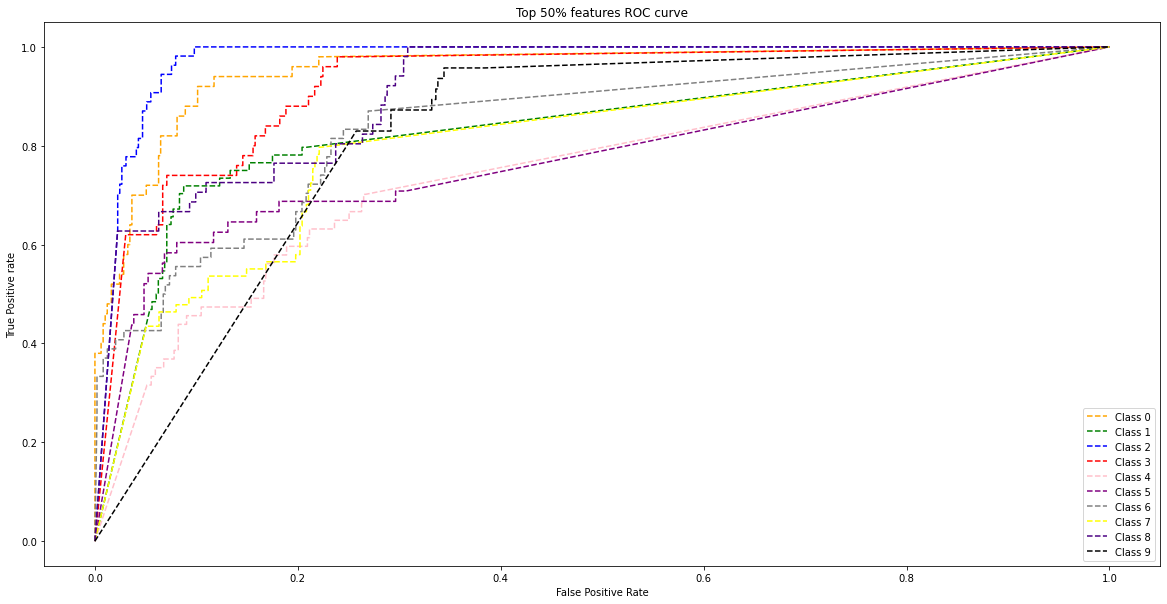

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(fpr_sk50[0], tpr_sk50[0], linestyle='--',color='orange', label='Class 0')
plt.plot(fpr_sk50[1], tpr_sk50[1], linestyle='--',color='green', label='Class 1')
plt.plot(fpr_sk50[2], tpr_sk50[2], linestyle='--',color='blue', label='Class 2')
plt.plot(fpr_sk50[3], tpr_sk50[3], linestyle='--',color='red', label='Class 3')
plt.plot(fpr_sk50[4], tpr_sk50[4], linestyle='--',color='pink', label='Class 4')
plt.plot(fpr_sk50[5], tpr_sk50[5], linestyle='--',color='purple', label='Class 5')
plt.plot(fpr_sk50[6], tpr_sk50[6], linestyle='--',color='gray', label='Class 6')
plt.plot(fpr_sk50[7], tpr_sk50[7], linestyle='--',color='yellow', label='Class 7')
plt.plot(fpr_sk50[8], tpr_sk50[8], linestyle='--',color='indigo', label='Class 8')
plt.plot(fpr_sk50[9], tpr_sk50[9], linestyle='--',color='black', label='Class 9')

plt.title('Top 50% features ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc=4)

##### 5.3. Top 10% features for each class

In [89]:
y_test_sk10, pred_prob_sk10 = [], []
accuracies_top10 = np.zeros(10)
for i in range(10):
    acc10, y_test_sk10, pred_prob_sk10 = classifier(sk_train_top10, labels)
    accuracies_top10[i] = acc10
nb_accuracies['TOP10%'] = accuracies_top10
print('AUC Average: ', roc_auc_score(y_test_sk10, pred_prob_sk10, multi_class='ovo', average='weighted'))

AUC Average:  0.8359353198536622


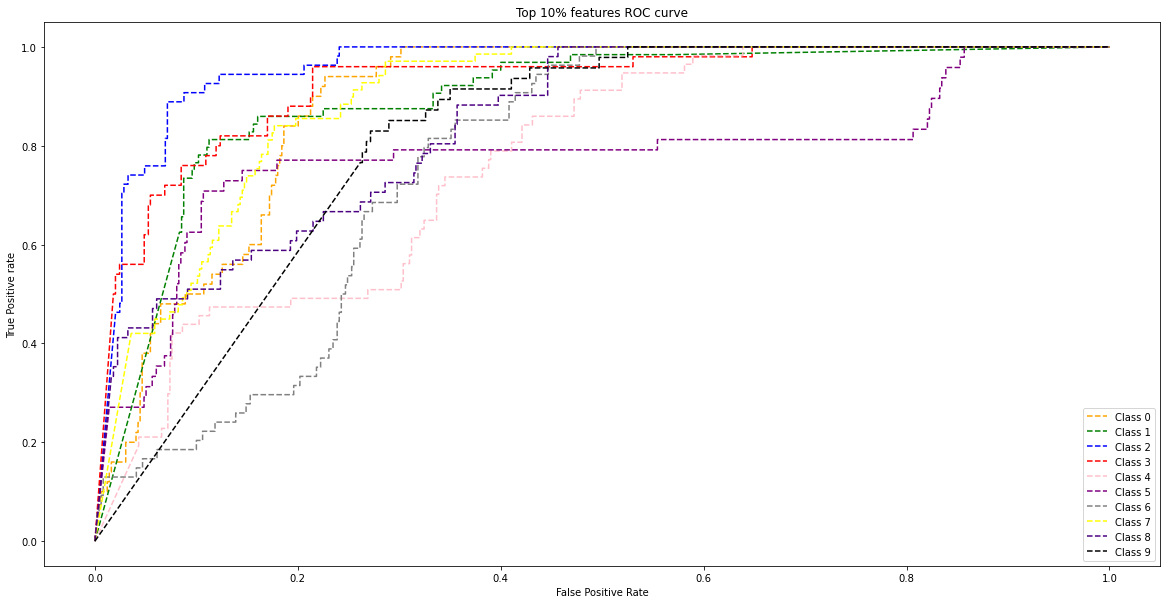

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(fpr_sk10[0], tpr_sk10[0], linestyle='--',color='orange', label='Class 0')
plt.plot(fpr_sk10[1], tpr_sk10[1], linestyle='--',color='green', label='Class 1')
plt.plot(fpr_sk10[2], tpr_sk10[2], linestyle='--',color='blue', label='Class 2')
plt.plot(fpr_sk10[3], tpr_sk10[3], linestyle='--',color='red', label='Class 3')
plt.plot(fpr_sk10[4], tpr_sk10[4], linestyle='--',color='pink', label='Class 4')
plt.plot(fpr_sk10[5], tpr_sk10[5], linestyle='--',color='purple', label='Class 5')
plt.plot(fpr_sk10[6], tpr_sk10[6], linestyle='--',color='gray', label='Class 6')
plt.plot(fpr_sk10[7], tpr_sk10[7], linestyle='--',color='yellow', label='Class 7')
plt.plot(fpr_sk10[8], tpr_sk10[8], linestyle='--',color='indigo', label='Class 8')
plt.plot(fpr_sk10[9], tpr_sk10[9], linestyle='--',color='black', label='Class 9')

plt.title('Top 10% features ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc=4)

In [90]:
y_test_sk5, pred_prob_sk5 = [], []
accuracies_top5 = np.zeros(10)
for i in range(10):
    acc5, y_test_sk5, pred_prob_sk5 = classifier(sk_train_top5, labels)
    accuracies_top5 = acc5
nb_accuracies['TOP5%'] = accuracies_top5
print('AUC Average: ', roc_auc_score(y_test_sk5, pred_prob_sk5, multi_class='ovo', average='weighted'))

AUC Average:  0.7677225143988367


## 6. Appendix 

**Relief Algorithm** <br>
Determines the quality of an attribute on the basis of how well it can distinguish between instances close together. <br>

In [ ]:
# top 50% features
fs = ReliefF(n_neighbors=200, n_features_to_keep=1024)
train_top10 = fs.fit_transform(blur, labels)

# top 10% features
fs = ReliefF(n_neighbors=200, n_features_to_keep=1024)
train_top10 = fs.fit_transform(blur, labels)

# top 5% features
fs = ReliefF(n_neighbors=200, n_features_to_keep=1024)
train_top10 = fs.fit_transform(blur, labels)

Calculate false positive (fpr) and true positive rate (tpr) for each NB classifier instance. 

In [87]:
fpr_all, fpr_50, fpr_sk50, fpr_10, fpr_sk10, fpr_5, fpr_sk5 = {}, {}, {}, {}, {}, {}, {}
tpr_all, tpr_50, tpr_sk50, tpr_10, tpr_sk10, tpr_5, tpr_sk5 = {}, {}, {}, {}, {}, {}, {}
th_all, th_50, th_sk50, th_10, th_sk10, th_5, th_sk5 = {}, {}, {}, {}, {}, {}, {}
for i in range(len(key)):    
    fpr_all[i], tpr_all[i], th_all[i] = roc_curve(y_test_all, pred_prob_all[:,i], pos_label=i)
    fpr_50[i], tpr_50[i], th_50[i] = roc_curve(y_test_50, pred_prob_50[:,i], pos_label=i)
    fpr_sk50[i], tpr_sk50[i], th_sk50[i] = roc_curve(y_test_sk50, pred_prob_sk50[:,i], pos_label=i)
    fpr_10[i], tpr_10[i], th_10[i] = roc_curve(y_test_10, pred_prob_10[:,i], pos_label=i)
    fpr_sk10[i], tpr_sk10[i], th_sk10[i] = roc_curve(y_test_sk10, pred_prob_sk10[:,i], pos_label=i)
    fpr_5[i], tpr_5[i], th_5[i] = roc_curve(y_test_5, pred_prob_5[:,i], pos_label=i)
    fpr_sk5[i], tpr_sk5[i], th_sk5[i] = roc_curve(y_test_sk5, pred_prob_sk5[:,i], pos_label=i)

NameError: name 'y_test_50' is not defined

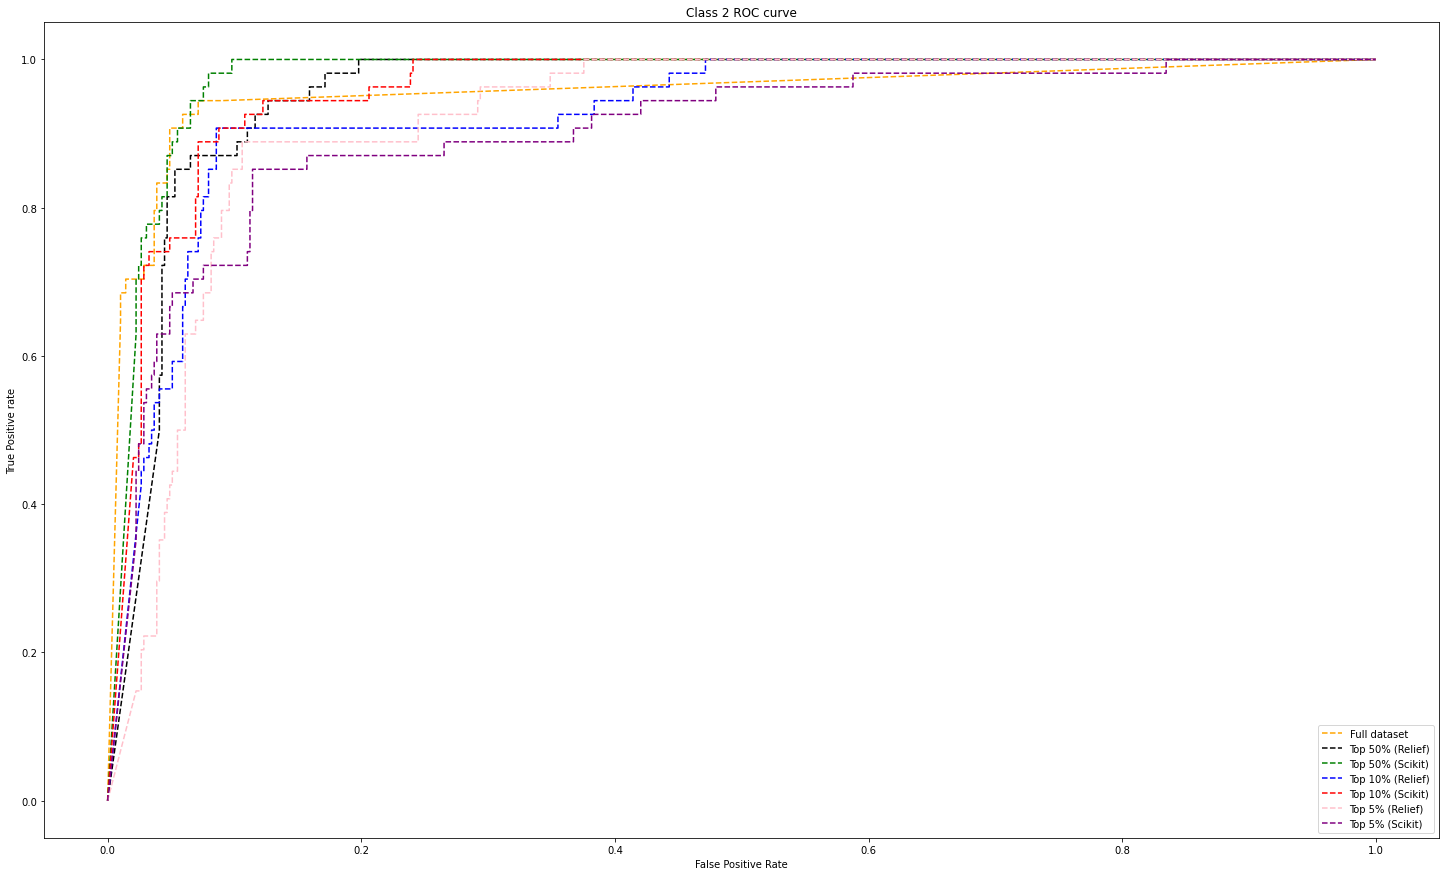

In [ ]:
plt.figure(figsize=(25, 15))
plt.plot(fpr_all[2], tpr_all[2], linestyle='--',color='orange', label='Full dataset')
plt.plot(fpr_50[2], tpr_50[2], linestyle='--',color='black', label='Top 50% (Relief)')
plt.plot(fpr_sk50[2], tpr_sk50[2], linestyle='--',color='green', label='Top 50% (Scikit)')
plt.plot(fpr_10[2], tpr_10[2], linestyle='--',color='blue', label='Top 10% (Relief)')
plt.plot(fpr_sk10[2], tpr_sk10[2], linestyle='--',color='red', label='Top 10% (Scikit)')
plt.plot(fpr_5[2], tpr_5[2], linestyle='--',color='pink', label='Top 5% (Relief)')
plt.plot(fpr_sk5[2], tpr_sk5[2], linestyle='--',color='purple', label='Top 5% (Scikit)')

plt.title('Class 2 ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc=4)

Overall Relief feature selection algorithm performs worse than Scikit, for both algorithms accuracy decreases as the number of features is reduced with the exception of Top 50% Scikit dataset which performs best.

Accuracy Score:  0.4632352941176471

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.93      0.28      0.43        50
           1       0.51      0.59      0.55        64
           2       0.60      0.57      0.58        54
           3       0.36      0.76      0.49        50
           4       0.27      0.28      0.28        57
           5       0.38      0.54      0.45        48
           6       1.00      0.02      0.04        54
           7       0.55      0.41      0.47        69
           8       0.52      0.63      0.57        51
           9       0.51      0.60      0.55        47

    accuracy                           0.46       544
   macro avg       0.56      0.47      0.44       544
weighted avg       0.56      0.46      0.44       544



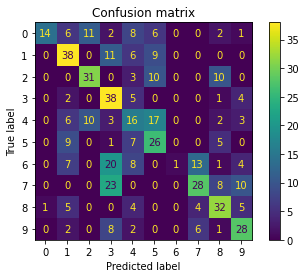

In [ ]:
y_test_50, pred_prob_50 = [], []
y_test_50, pred_prob_50 = classifier(train_top50, labels)

Accuracy Score:  0.40808823529411764

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.28      0.20      0.23        50
           1       0.40      0.59      0.48        64
           2       0.61      0.52      0.56        54
           3       0.31      0.86      0.46        50
           4       0.52      0.44      0.48        57
           5       0.74      0.54      0.63        48
           6       0.50      0.02      0.04        54
           7       0.42      0.23      0.30        69
           8       0.77      0.45      0.57        51
           9       0.16      0.26      0.20        47

    accuracy                           0.41       544
   macro avg       0.47      0.41      0.39       544
weighted avg       0.47      0.41      0.39       544



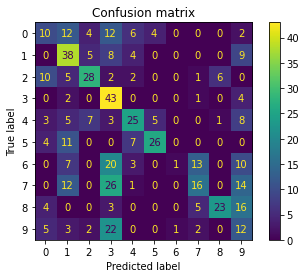

In [ ]:
y_test_10, pred_prob_10 = [], []
y_test_10, pred_prob_10 = classifier(train_top10, labels)

Accuracy Score:  0.3382352941176471

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.20      0.12      0.15        50
           1       0.38      0.56      0.46        64
           2       0.39      0.22      0.28        54
           3       0.28      0.86      0.43        50
           4       0.42      0.44      0.43        57
           5       0.71      0.50      0.59        48
           6       0.56      0.09      0.16        54
           7       0.44      0.22      0.29        69
           8       0.53      0.16      0.24        51
           9       0.12      0.21      0.15        47

    accuracy                           0.34       544
   macro avg       0.40      0.34      0.32       544
weighted avg       0.41      0.34      0.32       544



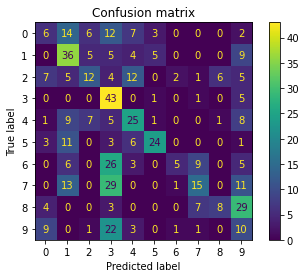

In [ ]:
y_test_5, pred_prob_5 = [], []
y_test_5, pred_prob_5 = classifier(train_top5, labels)

# Part 2: Clustering

Part 2 of Data Mining & Machine Learning coursework explores different data clustering algorithms. 

## 2.1. Setup

#### Install Packages

In [1]:
import sys
import os
import cv2
import sklearn
import numpy as np
from scipy import stats
import pandas as pd
from sklearn import metrics

from imageio import imread
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import scipy.cluster.hierarchy as shc
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

# for plotting figures/ data visualisation 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

#### Get Data <br>
Import the pre-prepared images and apply pre-processing techniques from part 1.


In [2]:
ds1 = os.listdir("resized1")
ds2 = os.listdir("resized2")
ds3 = os.listdir("resized3")
def to_array(train, labels, data, path):
    for i, im in enumerate(data):
        filename = path + im    
        image = np.asarray(imread(filename), dtype=None) # convert the image to an array
        train.append(image) 
        labels.append(0 if im.split(".")[0] == "a" # labels are determined by the name of the image
                      else 1 if im.split(".")[0] == "b" 
                      else 2 if im.split(".")[0] == "c" 
                      else 3 if im.split(".")[0] == "d" 
                      else 4 if im.split(".")[0] == "e" 
                      else 5 if im.split(".")[0] == "f" 
                      else 6 if im.split(".")[0] == "g" 
                      else 7 if im.split(".")[0] == "h" 
                      else 8 if im.split(".")[0] == "i" 
                      else 9)
labels1, labels2, labels3, train1, train2, train3 = [], [], [], [], [], []

ds1.remove(".DS_Store")
ds2.remove(".DS_Store")
ds3.remove(".DS_Store")

to_array(train1, labels1, ds1, 'resized1/')
to_array(train2, labels2, ds2, 'resized2/')
to_array(train3, labels3, ds3, 'resized3/')
# flatten the data (images are in the form of 1D arrays)
train1 = np.array(train1)
train2 = np.array(train2)
train3 = np.array(train3)
train1 = train1.reshape(len(train1), 25*25)
train2 = train2.reshape(len(train2), 25*25)
train3 = train3.reshape(len(train3), 25*25)
# flip the colour scheme of the second dataset
rgb = np.full((len(train2),len(train2[0])), 255)
# reverse the colour scheme by subtracting each pixel value from 255
train2 = np.subtract(rgb,train2) 
# combine the three datasets together
label_c = np.concatenate((labels1, labels2, labels3), axis=0)
train = np.concatenate((train1, train2, train3), axis=0)
# normalize values in the range 0 to 1
train = train / 255
blur = []
for i in range(len(train)):
    blur.append(cv2.GaussianBlur(train[i], (5, 5), 0)) 


In [3]:
train_c = np.array(blur)
train_c = train.reshape(train_c.shape[0], train_c.shape[1])
key_c = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

NameError: name 'np' is not defined

In [155]:
train_top50_c = SelectPercentile(f_classif, percentile=50).fit_transform(train_c,label_c)

## 2.2. K-means Clustering

K-means clustering is an unsupervised learning algorithm which sorts data into clusters based on the minimum distance to cluster center (centroid) ?

### Finding the Optimal Number of Clusters

#### Elbow Method

Start at 10 clusters - dateset is known to have 10 classes, hence the minimum number of clusters should be at least 10.

In [156]:
kmeans_per_k_all = [KMeans(n_clusters=k).fit(train_c)
                for k in range(10, 80)]
                
kmeans_per_k_top50 = [KMeans(n_clusters=k).fit(train_top50_c)
                for k in range(10, 80)] 

inertias_full = [model.inertia_ for model in kmeans_per_k_all]
inertias_top50 = [model.inertia_ for model in kmeans_per_k_top50]

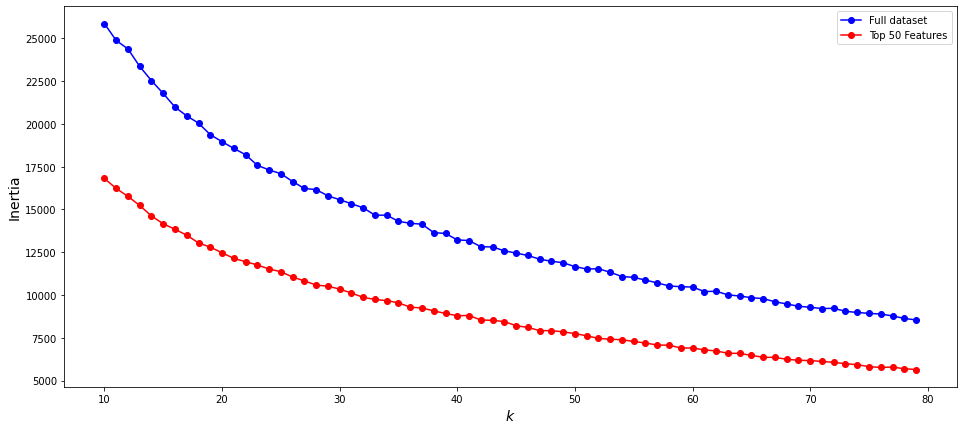

In [157]:
plt.figure(figsize=(16, 7))
plt.plot(range(10, 80), inertias_full, "bo-", label='Full dataset')
plt.plot(range(10, 80), inertias_top50, "ro-", label ='Top 50 Features')
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.legend()
plt.show()

Plotting inertias with respect to the number of clusters does not provide a clear idea for the optimal number of clusters. Given the number of classes in the dataset, the number of clusters must be at least 10, yet from the elbow plot the optimal number of clusters appears to be in the 7 to 8 range.

#### Silhouette Scores

In [158]:
silhouettes_full = [metrics.silhouette_score(train_c, model.labels_, metric='euclidean') for model in kmeans_per_k]
silhouettes_top50 = [metrics.silhouette_score(train_top50_c, model.labels_, metric='euclidean') for model in kmeans_per_k]

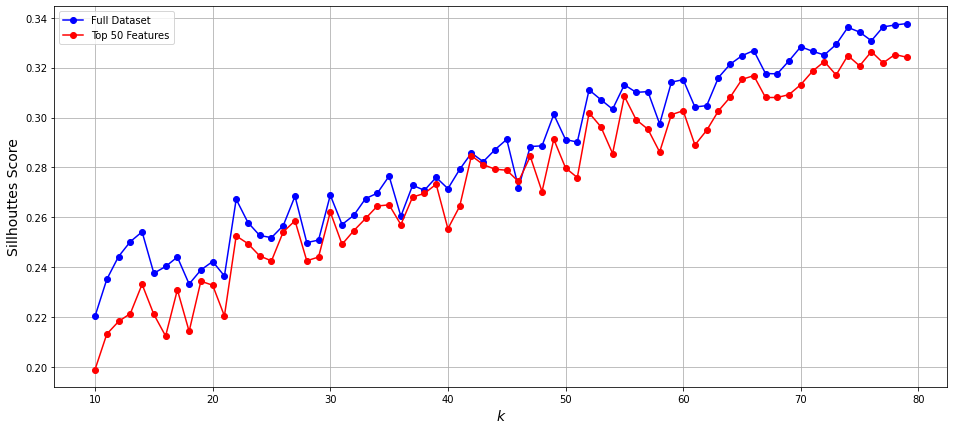

In [159]:
plt.figure(figsize=(16, 7))
plt.plot(range(10, 80), silhouettes_full, "bo-", label='Full Dataset')
plt.plot(range(10, 80), silhouettes_top50, "ro-", label='Top 50 Features')
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Sillhouttes Score", fontsize=14)
plt.grid()
plt.legend()
plt.show()

#### Relationship between Accuracy and Number of Clusters

In [160]:
def find_accuracy(k_labels, y_labels):
    mapping = {}

    for i in np.unique(k_labels):
        index = np.where(k_labels == i,1,0)
        num = np.bincount(y_labels[index==1]).argmax()
        mapping[i] = num

    pred_labels = np.random.rand(len(k_labels))
    for i in range(len(k_labels)):
        pred_labels[i] = mapping[k_labels[i]]
    
    return accuracy_score(pred_labels, y_labels)

In [161]:
def get_accuracy(start, stop, step, data):
    accuracy_train_clusters = []
    for i in range(start, stop, step):
        kmeans = KMeans(n_clusters=i)
        y_pred_clusters = kmeans.fit_predict(data)
        accuracy_train_clusters.append(find_accuracy(y_pred_clusters, label_c))
    return accuracy_train_clusters

accuracy_train_kmeans_full = get_accuracy(10, 510, 25, train_c)
accuracy_train_kmeans_top50 = get_accuracy(10, 510, 25, train_top50_c)

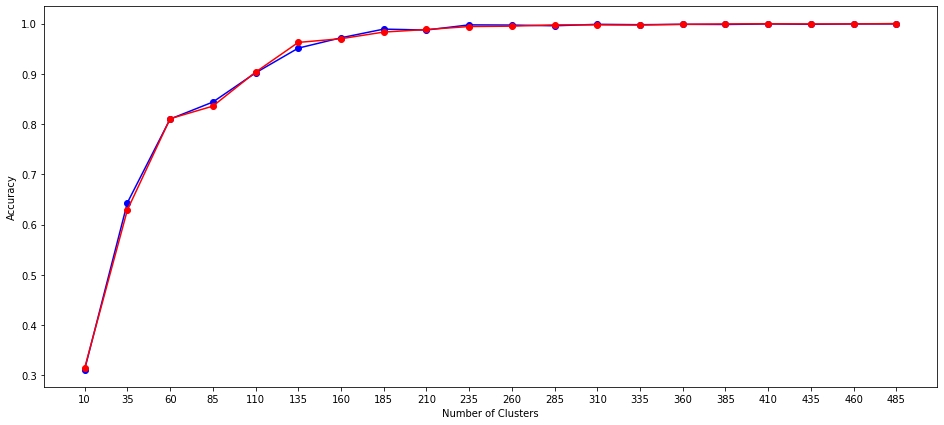

In [162]:
x_axis = np.arange(10, 510, step=25)
plt.figure(figsize=(16, 7))
plt.plot(x_axis, accuracy_train_kmeans_full, "bo-", label="Full Dataset")
plt.plot(x_axis, accuracy_train_kmeans_top50, "ro-", label="Top 50 Features")
plt.xlabel("Number of Clusters")
plt.ylabel("Accuracy")
plt.xticks(x_axis)
plt.show()

### Predict

#### Fit the data

In [163]:
kmeans10 = KMeans(n_clusters=10)
kmeans30 = KMeans(n_clusters=30)
kmeans55 = KMeans(n_clusters=55)

In [164]:
clust_accuracies = pd.DataFrame()

In [217]:
kmeans_accuracies_10 = np.zeros(10)
kmeans_accuracies_30 = np.zeros(10)
kmeans_accuracies_55 = np.zeros(10)
kmeans_accuracies_10_top50 = np.zeros(10)
kmeans_accuracies_30_top50  = np.zeros(10)
kmeans_accuracies_55_top50  = np.zeros(10)

for i in range (10):
    # fit the data
    kmeans_y_pred_10 = kmeans10.fit_predict(train_c)
    kmeans_y_pred_30 = kmeans30.fit_predict(train_c)
    kmeans_y_pred_10_top50 = kmeans10.fit_predict(train_top50_c)
    kmeans_y_pred_30_top50 = kmeans30.fit_predict(train_top50_c)
    kmeans_y_pred_55_top50 = kmeans55.fit_predict(train_top50_c)
    kmeans_y_pred_55 = kmeans55.fit_predict(train_c)

    kmeans_accuracies_10[i] = find_accuracy(kmeans_y_pred_10, label_c)
    kmeans_accuracies_30[i] = find_accuracy(kmeans_y_pred_30, label_c)
    kmeans_accuracies_55[i] = find_accuracy(kmeans_y_pred_55, label_c)
    kmeans_accuracies_10_top50[i] = find_accuracy(kmeans_y_pred_10_top50, label_c)
    kmeans_accuracies_30_top50[i] = find_accuracy(kmeans_y_pred_30_top50, label_c)
    kmeans_accuracies_55_top50[i] = find_accuracy(kmeans_y_pred_55_top50, label_c)

#### Find accuracy

In [173]:
clust_accuracies['KMeans_10'] = kmeans_accuracies_10
clust_accuracies['KMeans_30'] = kmeans_accuracies_30
clust_accuracies['KMeans_55'] = kmeans_accuracies_55
clust_accuracies['KMeans_10_TOP50'] = kmeans_accuracies_10_top50
clust_accuracies['KMeans_30_TOP50'] = kmeans_accuracies_30_top50
clust_accuracies['KMeans_55_TOP50'] = kmeans_accuracies_55_top50

print(np.mean(kmeans_accuracies_10), np.mean(kmeans_accuracies_30), np.mean(kmeans_accuracies_55))
print(np.mean(kmeans_accuracies_10_top50), np.mean(kmeans_accuracies_30_top50), np.mean(kmeans_accuracies_55_top50))

0.3062132352941177 0.6162132352941178 0.7673897058823529
0.3173161764705882 0.5915808823529412 0.7368014705882353


### Visualising the Clusters 

#### Functions for visualising the clusters 

In [174]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1],c=y, s=1) #s is the size of dots.
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=10, linewidths=15,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=11)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=11, rotation=0)
    else:
        plt.tick_params(labelleft=False)

#### Visualising the data

In [175]:
top_two_features = train[87:89].T
top_two_kmeans = kmeans60.fit(top_two_features)

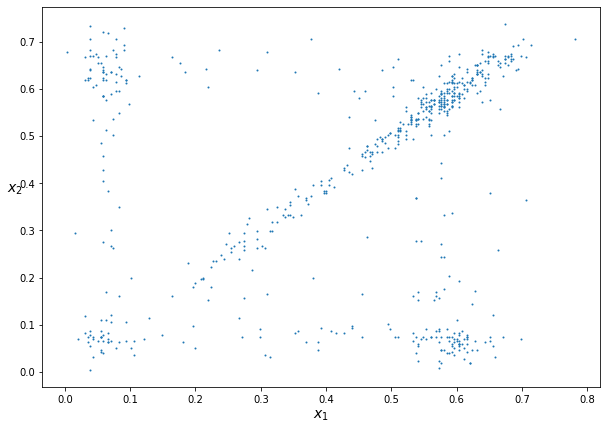

In [176]:
plt.figure(figsize=(10, 7))
plot_clusters(top_two_features)
plt.show()

No obvious clusters. 

#### Plotting decision boundaries  

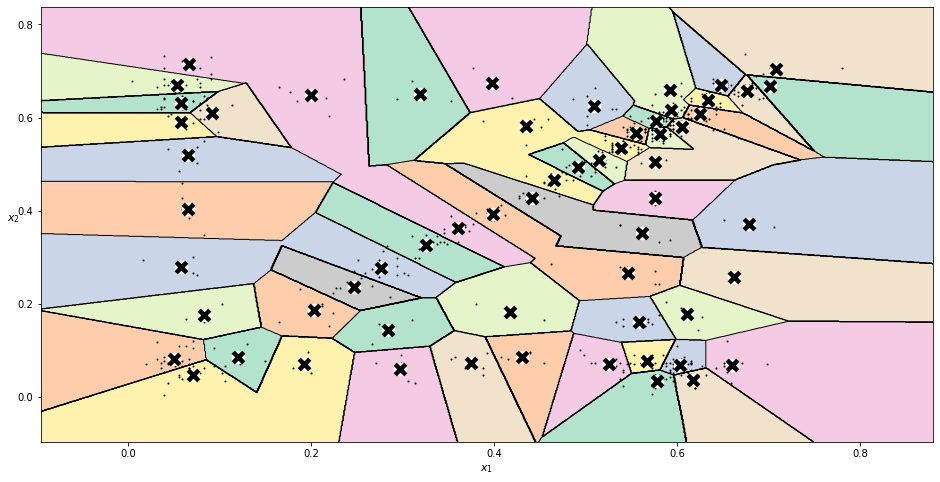

In [177]:
plt.figure(figsize=(16, 8))
plot_decision_boundaries(top_two_kmeans,top_two_features)
plt.show()

Features visualised are the most correlating pixels with the class variable (pixels 87 and 88) with variance of 0.398327 and 0.408407 respectively. Given that any two pixels among 625px are unlikely to have a major impact in determining the correct class of an image (as demonstrated by the relatively low variance) the clusters are not very prominent.

### Principal Component Analysis 

A method for dimensionality reduction.

#### Finding the Components with most Variance

**Reference:** https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2

In [178]:
pca = PCA(n_components=50)
principal_componenets = pca.fit_transform(train_c)

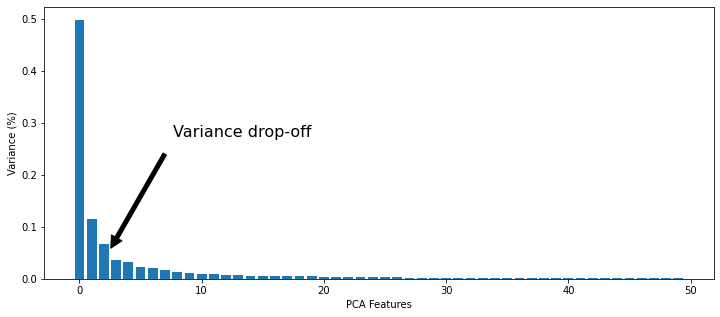

In [179]:
features = range(pca.n_components_)
plt.figure(figsize=(12, 5))
plt.bar(features, pca.explained_variance_ratio_)
plt.annotate('Variance drop-off',
              xy=(2, pca.explained_variance_ratio_[3]),
              xytext=(0.2, 0.5),
              textcoords='figure fraction',
              fontsize=16,
              arrowprops=dict(facecolor='black', shrink=0.1)
             )
plt.xlabel('PCA Features')
plt.ylabel('Variance (%)')
plt.show()

First 3 components explain majority of variance in the data.

#### Visualising the clusters

In [180]:
components = pd.DataFrame(principal_componenets)

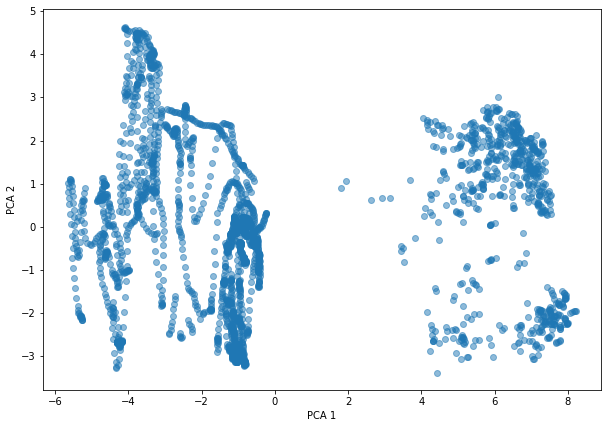

In [181]:
plt.figure(figsize=(10, 7))
plt.scatter(components[0], components[1], alpha=0.5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

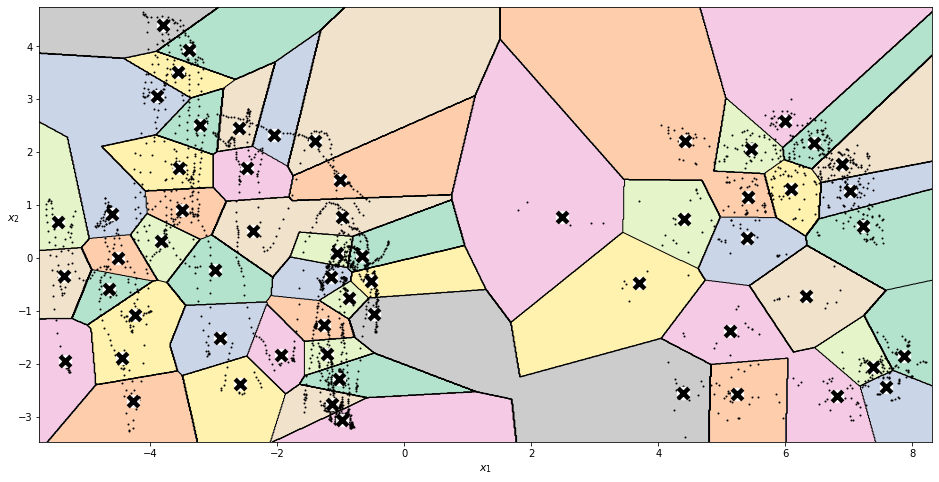

In [182]:
pca_model = KMeans(n_clusters=60)
pca_X_train = np.array(components.iloc[:,:2])

pred = pca_model.fit(pca_X_train)

plt.figure(figsize=(16, 8))
plot_decision_boundaries(pred, pca_X_train)
plt.show()

#### Finding Accuracy

In [183]:
pca_train_accuracy = np.zeros(10)

for i in range(10):
    pca_train = pca_model.fit_predict(pca_X_train)
    pca_train_acc = find_accuracy(pca_train, label_c)
    pca_train_accuracy[i] = pca_train_acc


clust_accuracies['PCA_train'] = pca_train_accuracy

print(np.mean(pca_train_accuracy))

0.530220588235294


## 2.3. Gaussian Mixture Model

### Fit the Data

In [186]:
gmm_model55 = GaussianMixture(n_components=55)
gmm_model30 = GaussianMixture(n_components=30)
gmm_model10 = GaussianMixture(n_components=10)


### Predict

In [213]:
gmm_accuracies_10, gmm_accuracies_30, gmm_accuracies_55, gmm_accuracies_55_top50 = np.zeros(10), np.zeros(10), np.zeros(10), np.zeros(10)

for i in range(10):
    gmm_model55.fit(train_c)
    gmm_model30.fit(train_c)
    gmm_model10.fit(train_c)

    gmm_pred_10 = gmm_model10.predict(train_c)
    gmm_pred_30 = gmm_model30.predict(train_c)
    gmm_pred_55 = gmm_model55.predict(train_c)

    gmm_model55.fit(train_top50_c)
    gmm_pred_55_top50 = gmm_model55.predict(train_top50_c)

    gmm_accuracies_10[i] = find_accuracy(gmm_pred_10, label_c)
    gmm_accuracies_30[i] = find_accuracy(gmm_pred_30, label_c)
    gmm_accuracies_55[i] = find_accuracy(gmm_pred_55, label_c)
    gmm_accuracies_55_top50[i] = find_accuracy(gmm_pred_55_top50, label_c)


clust_accuracies['GMM_10'] = gmm_accuracies_10
clust_accuracies['GMM_30'] = gmm_accuracies_30
clust_accuracies['GMM_55'] = gmm_accuracies_55
clust_accuracies['GMM_55_TOP50'] = gmm_accuracies_55_top50

print(np.mean(gmm_accuracies_10), np.mean(gmm_accuracies_30), np.mean(gmm_accuracies_55))

0.29863970588235295 0.596875 0.7596691176470589


### Visualise

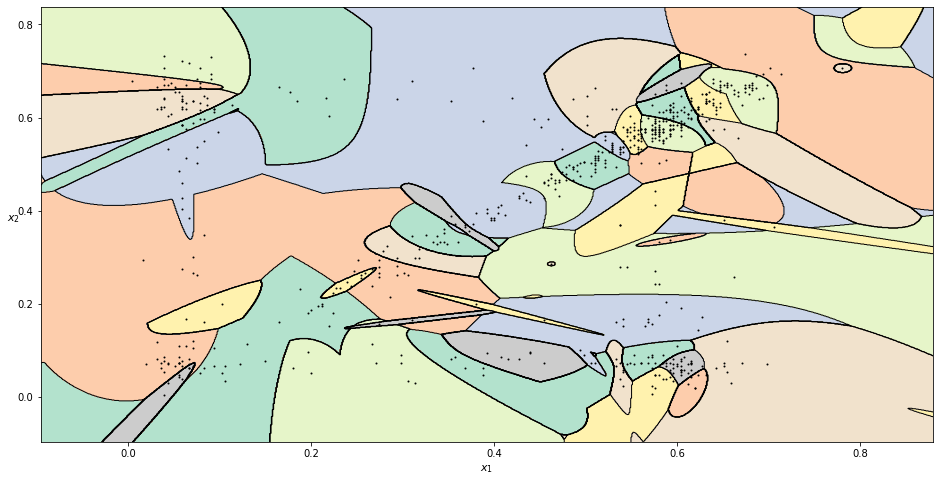

In [194]:
gmm_top_two_features = train[87:89].T
gmm_top_two_model = gmm_model55.fit(top_two_features)

plt.figure(figsize=(16, 8))
plot_decision_boundaries(gmm_top_two_model, gmm_top_two_features, show_centroids=False)
plt.show()

## 2.4. Hierarchical Clustering

**Reference:** https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

### Visualising the Dendogram

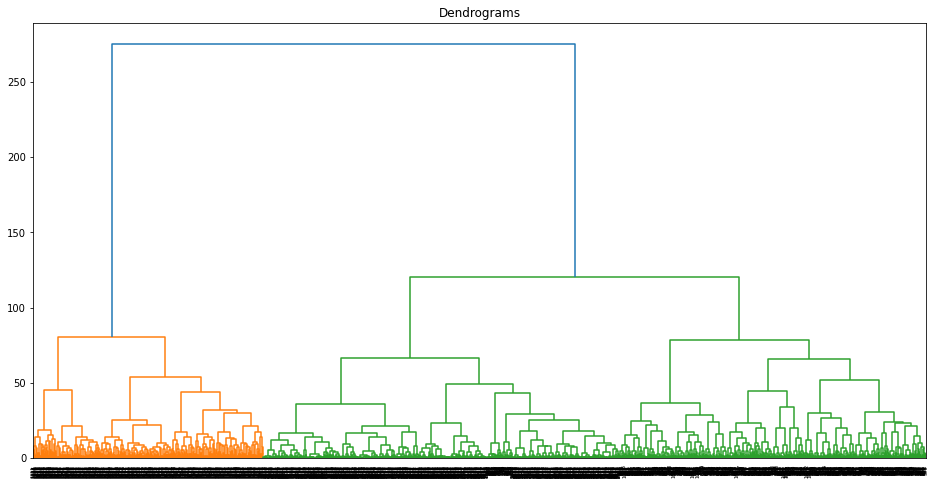

In [192]:
df_h_train = pd.DataFrame(train_c)

plt.figure(figsize=(16, 8))
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_h_train, method='ward'))

### Predict

In [202]:
hcluster10 = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward') 
hcluster30 = AgglomerativeClustering(n_clusters=30, affinity='euclidean', linkage='ward')
hcluster55 = AgglomerativeClustering(n_clusters=55, affinity='euclidean', linkage='ward')

h_train_accuracy_10 = np.zeros(10)
h_train_accuracy_30 = np.zeros(10)
h_train_accuracy_55 = np.zeros(10)

for i in range(10):
    h_train_10 = hcluster10.fit_predict(df_h_train)
    h_train_30 = hcluster30.fit_predict(df_h_train)
    h_train_55 = hcluster55.fit_predict(df_h_train)

    h_acc_train_10 = find_accuracy(h_train_10, label_c)
    h_acc_train_30 = find_accuracy(h_train_30, label_c)
    h_acc_train_55 = find_accuracy(h_train_55, label_c)

    h_train_accuracy_10[i] = h_acc_train_10 
    h_train_accuracy_30[i] = h_acc_train_30 
    h_train_accuracy_55[i] = h_acc_train_55 

clust_accuracies['Hier_10'] = h_train_accuracy_10
clust_accuracies['Hier_30'] = h_train_accuracy_30
clust_accuracies['Hier_55'] = h_train_accuracy_55

print(np.mean(h_train_accuracy_10), np.mean(h_train_accuracy_30), np.mean(h_train_accuracy_55))

0.31727941176470587 0.6183823529411765 0.7783088235294118


## 2.4. Comparison of Clustering Algorithms and Bayesian Classification

Plot of accuracies for the different NB models and clusters as well.

In [214]:
frames = [nb_accuracies, clust_accuracies]
combo_accuracies = pd.concat(frames, axis=1)
combo_accuracies.head()

ALL    TOP50%    TOP10%     TOP5%  KMeans_10  KMeans_30  KMeans_55  \
0  0.477941  0.505515  0.398897  0.319853   0.305882   0.600368   0.775000   
1  0.477941  0.505515  0.398897  0.319853   0.314338   0.615074   0.770956   
2  0.477941  0.505515  0.398897  0.319853   0.305882   0.581618   0.780147   
3  0.477941  0.505515  0.398897  0.319853   0.305147   0.643015   0.784926   
4  0.477941  0.505515  0.398897  0.319853   0.306618   0.622059   0.759926   

   KMeans_10_TOP50  KMeans_30_TOP50  KMeans_55_TOP50  PCA_train    GMM_10  \
0         0.316912         0.595588         0.729412   0.523897  0.296324   
1         0.308824         0.570588         0.728676   0.538603  0.285294   
2         0.314338         0.584926         0.748897   0.520221  0.300000   
3         0.333824         0.595588         0.752941   0.523529  0.304412   
4         0.314338         0.598529         0.745588   0.536397  0.279412   

     GMM_30    GMM_55   Hier_10   Hier_30   Hier_55  GMM_55_TOP50  
0  0.588603  0.754779  0.317279  0.618382  0.778309      0.709926  
1  0.588971  0.744118  0.317279  0.618382  0.778309      0.717279  
2  0.568015  0.764338  0.317279  0.618382  0.778309      0.745956  
3  0.585662  0.750735  0.317279  0.618382  0.778309      0.742647  
4  0.605515  0.780882  0.317279  0.618382  0.778309      0.758456

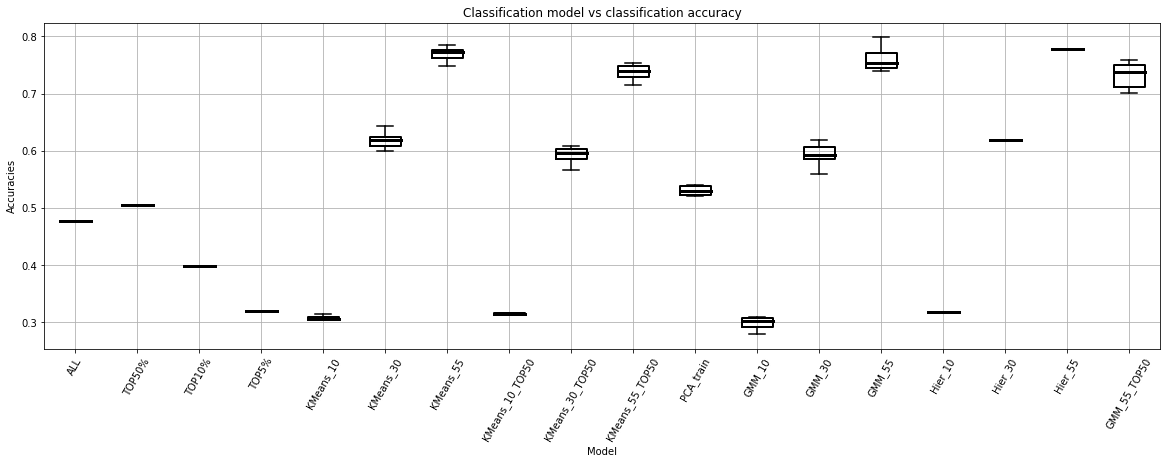

In [215]:
boxplot = combo_accuracies.boxplot(figsize=(20, 6), boxprops=dict(linestyle='-', linewidth=2), showfliers=False, grid=True, rot=60, 
             flierprops=dict(linestyle='-', linewidth=1.5),
             medianprops=dict(linestyle='-', linewidth=3, color='black'),
             whiskerprops=dict(linestyle='-', linewidth=1.5),
             capprops=dict(linestyle='-', linewidth=1.5))
boxplot.set_ylabel("Accuracies")
boxplot.set_xlabel("Model")
boxplot.set_title("Classification model vs classification accuracy")
plt.show()

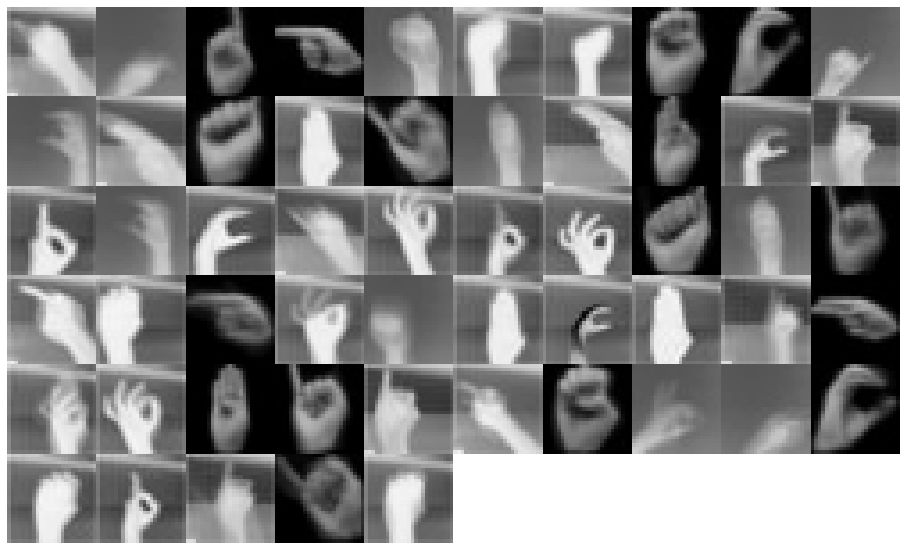

In [224]:
centroids = kmeans55.cluster_centers_
plt.figure(figsize=(16, 12))
plot_digits(centroids, images_per_row=10)

**Pros and cons of using different clustering algorithms** 

Using clustering on a dataset with known number of classes - is it really a form of unsupervised learning? <br>
K-means clustering:
- distance based algorithm, very quick
- need to have a good idea of the number of clusters to use (the intuition to use k = nr of classes is faulty)

PCA:
- more obvious clustering 
- not the best idea for this dataset

Gaussian Mixture Models:
- slower, more computationally expensive, may require more iterations to reach a minimum 


Hierarchical clustering:
- distance based algorithm (euclidean)
- number of clusters can be picked from the dendogram
- slower due to the underlying computations


# Part 3: Decision Trees

## 3.1. Setup

In [4]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import KFold

In [115]:
X_train, X_test, y_train, y_test = train_test_split(train_c, label_c, test_size=0.1, random_state=0)

In [116]:
trees_accuracy = pd.DataFrame()

## 3.2. J48 Algorithm

### Create a Tree

In [117]:
tree_clf = DecisionTreeClassifier(max_depth=12, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12, random_state=42)

In [118]:
forest_clf = RandomForestClassifier(max_depth=12, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, random_state=42)

### Visualise

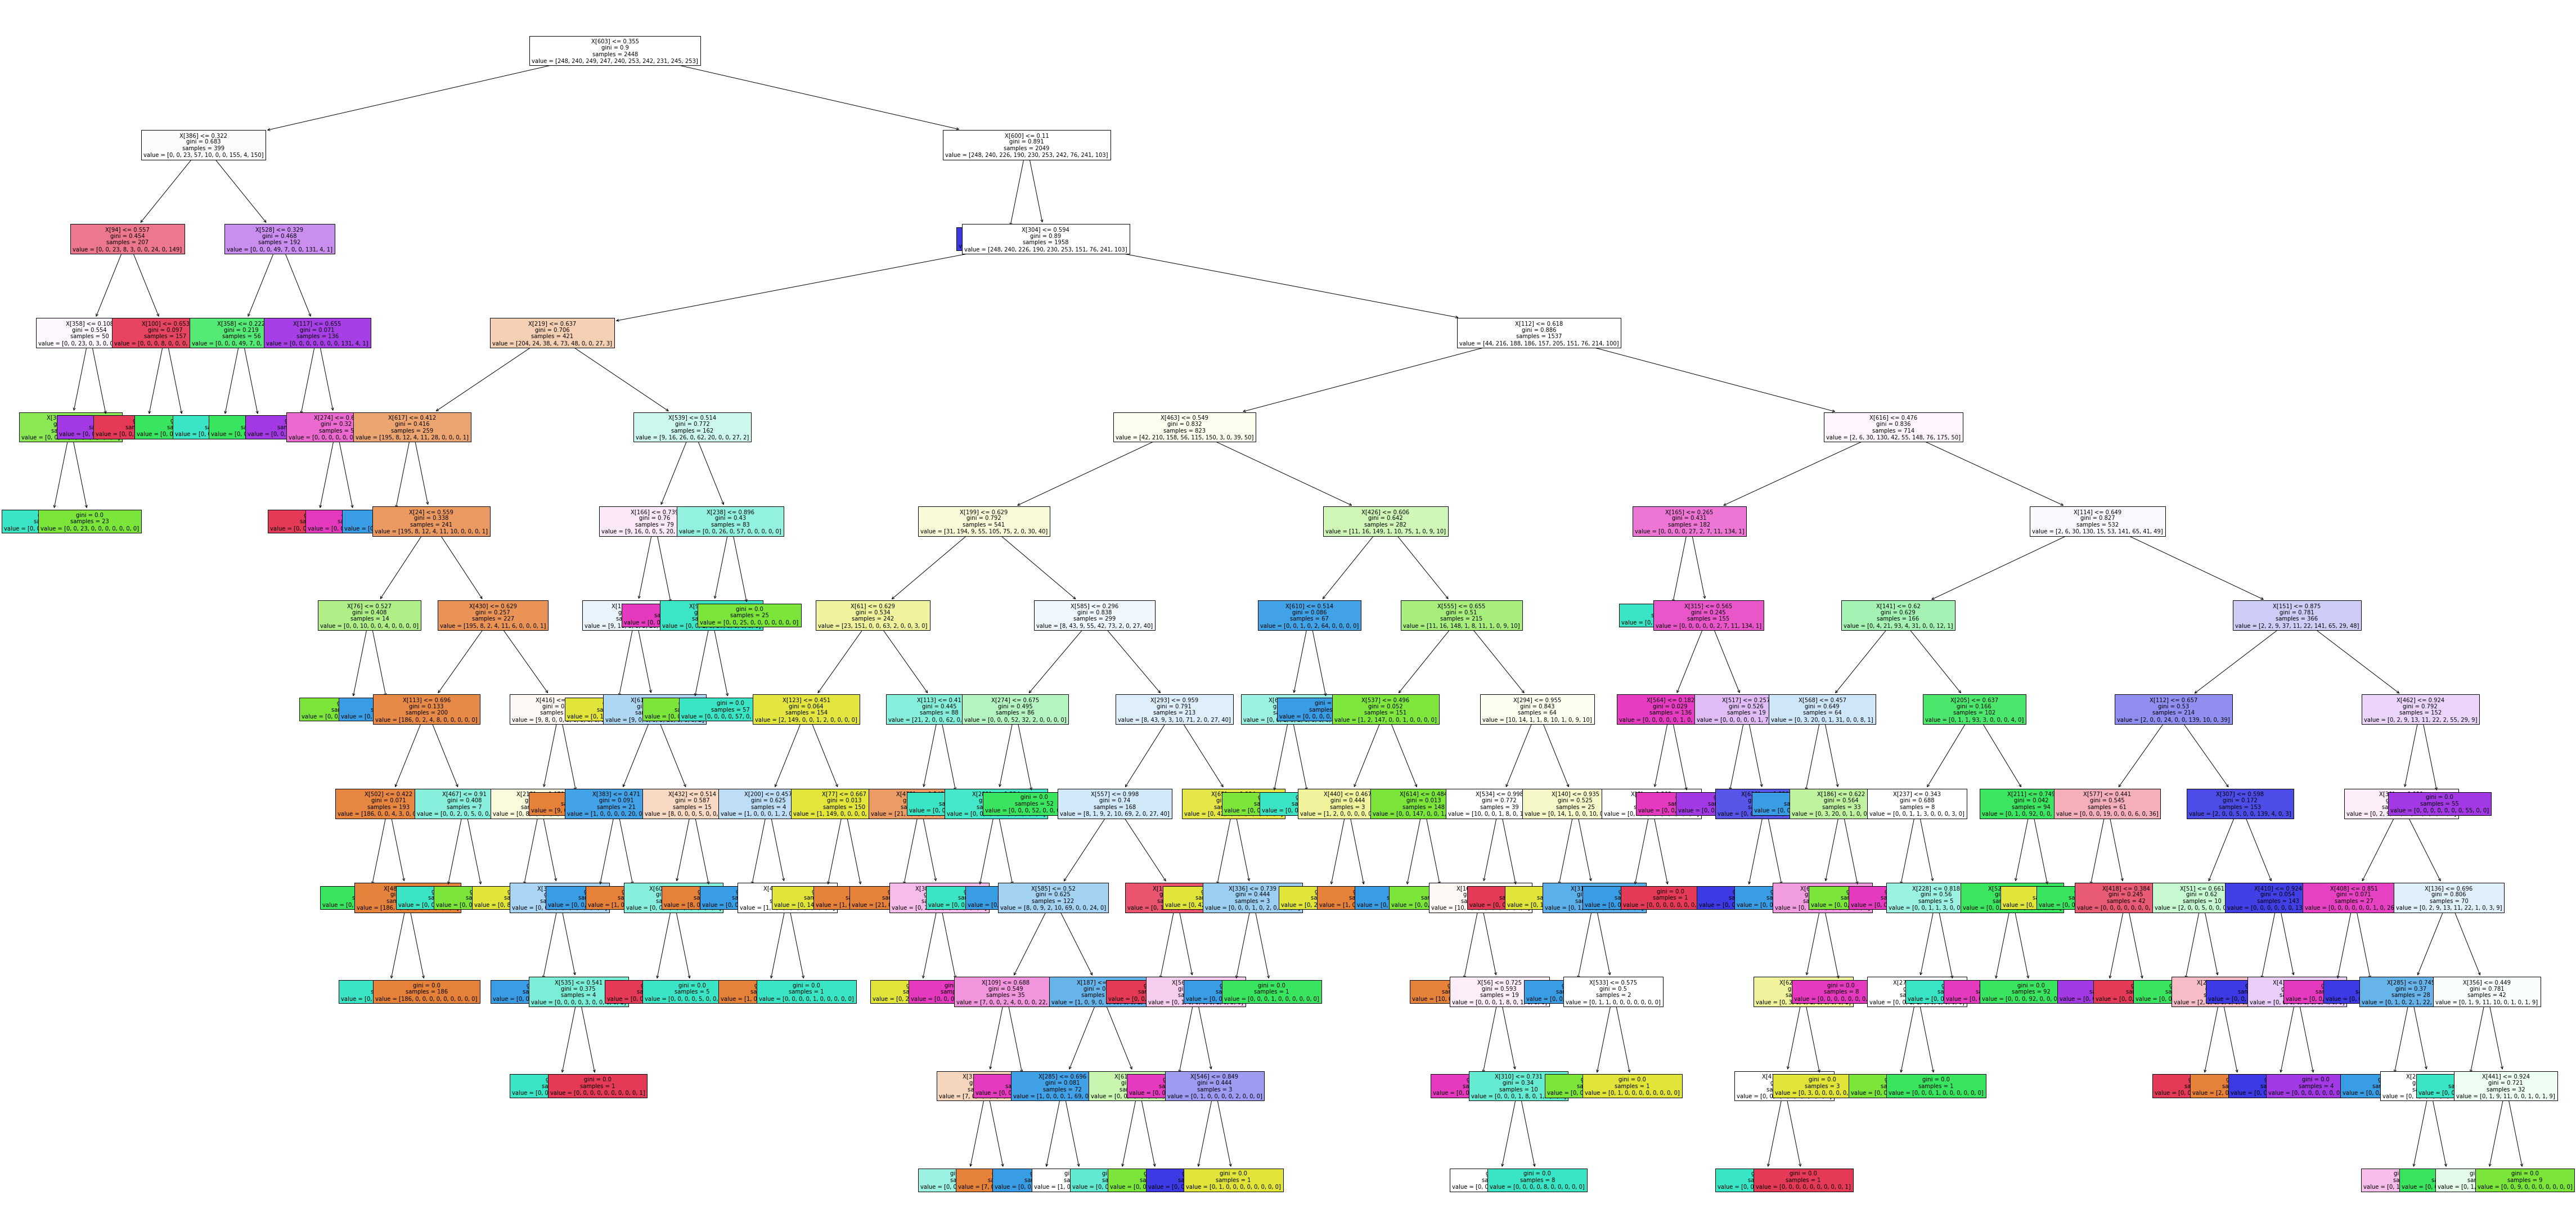

In [119]:
plt.figure(figsize=(80, 40))
plot_tree(tree_clf, filled=True, fontsize=10)
plt.show()

### Accuracy using the Training Set

In [120]:
y_pred_train_set = tree_clf.predict(X_train)
accuracy_train_set = accuracy_score(y_pred_train_set, y_train)
trees_accuracy['Tree_Train_set'] = [accuracy_train_set]

forest_pred_train_set = forest_clf.predict(X_train)
forest_accuracy_train_set = accuracy_score(forest_pred_train_set, y_train)
trees_accuracy['Forest_Train_set'] = [forest_accuracy_train_set]


print('Tree Accuracy: {}'.format(accuracy_train_set))
print('Forest Accuracy: {}'.format(forest_accuracy_train_set))
print('TREE CLASSIFICATION REPORT')
print(classification_report(y_train, y_pred_train_set))

Tree Accuracy: 0.9918300653594772
Forest Accuracy: 1.0
TREE CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       248
           1       1.00      0.99      1.00       240
           2       1.00      1.00      1.00       249
           3       0.95      0.99      0.97       247
           4       0.99      0.99      0.99       240
           5       1.00      1.00      1.00       253
           6       1.00      0.99      1.00       242
           7       1.00      1.00      1.00       231
           8       0.99      0.99      0.99       245
           9       1.00      0.96      0.98       253

    accuracy                           0.99      2448
   macro avg       0.99      0.99      0.99      2448
weighted avg       0.99      0.99      0.99      2448



#### Confusion Matrix

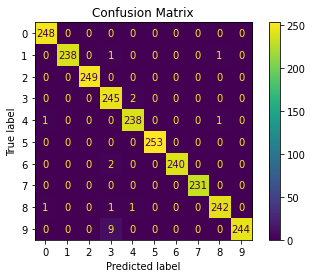

In [121]:
cm = confusion_matrix(y_train, y_pred_train_set, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

### Accuracy using Cross-validation 

In [122]:
def cross_validate(X, y, k, model, model_name):

    kf = KFold(n_splits=k)
    kf_accuracy = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        predicted = model.predict(X_test)

        acc = accuracy_score(predicted, y_test)
        kf_accuracy.append(acc)
    
    avg_kf_accuracy = sum(kf_accuracy)/k
    # print('{} Accuracy per fold: {}'.format(model_name, kf_accuracy))
    print('{} Average accuracy: {}'.format(model_name, avg_kf_accuracy))
    # print('CLASSIFICATION REPORT FOR THE LAST FOLD')
    # print(classification_report(y_test, predicted))

    return avg_kf_accuracy

In [123]:
tree_kfold_accuracy = cross_validate(X_train, y_train, 10, tree_clf, 'Tree')
forest_kfold_accuracy = cross_validate(X_train, y_train, 10, forest_clf, 'Forest')


trees_accuracy['Tree_Kfold_avg'] = [tree_kfold_accuracy]
trees_accuracy['Forest_Kfold_avg'] = [forest_kfold_accuracy]

Tree Average accuracy: 0.9187085981933757
Forest Average accuracy: 0.9959166945466711


### Accuracy using the Test Set

In [124]:
tree_clf.fit(X_train, y_train)
test_pred = tree_clf.predict(X_test)
accuracy_test_set = accuracy_score(test_pred, y_test)
trees_accuracy['Tree_Test_set'] = [accuracy_test_set]

forest_clf.fit(X_train, y_train)
forest_test_pred = forest_clf.predict(X_test)
forest_accuracy_test_set = accuracy_score(forest_test_pred, y_test)
trees_accuracy['Forest_Test_set'] = [forest_accuracy_test_set]


print('Tree Accuracy: {}'.format(accuracy_test_set))
print('Forest Accuracy: {}'.format(forest_accuracy_test_set))
# print('CLASSIFICATION REPORT')
# print(classification_report(y_test, test_pred))


Tree Accuracy: 0.9485294117647058
Forest Accuracy: 0.9963235294117647


Results from 10-fold cross validation and the decision tree's performance on the test set suggest that the model generalizes well to unseen data, accuracy of the tree when using the training set 0.991 vs cross-validation (average) 0.919 vs the test set 0.949.

#### Confusion Matrix 

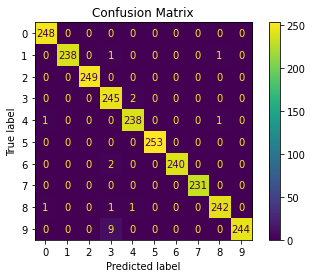

In [125]:
cm = confusion_matrix(y_train, y_pred_train_set, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

### Summary 

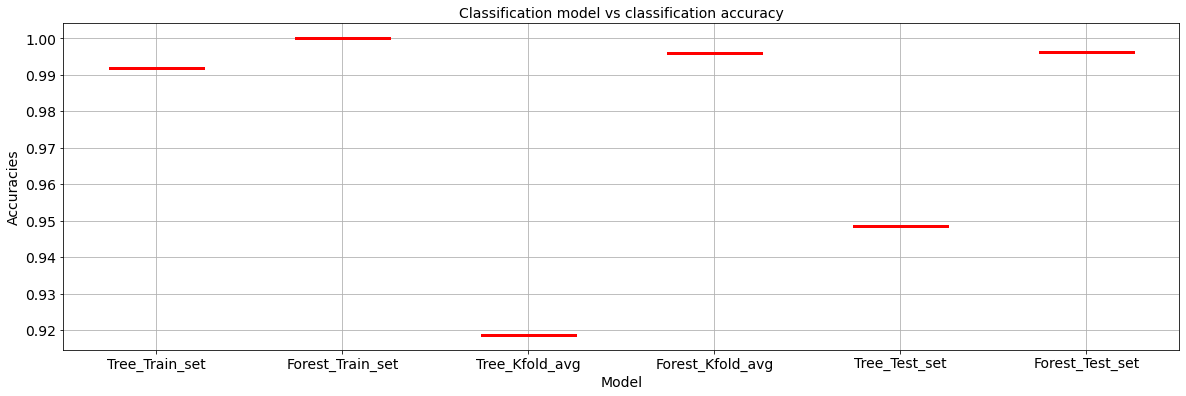

In [126]:
boxplot = trees_accuracy.boxplot(figsize=(20, 6), boxprops=dict(linestyle='-', linewidth=2), showfliers=False, grid=True, rot=0, 
             flierprops=dict(linestyle='-', linewidth=1.5),
             medianprops=dict(linestyle='-', linewidth=3, color='red'),
             whiskerprops=dict(linestyle='-', linewidth=1.5),
             capprops=dict(linestyle='-', linewidth=1.5), fontsize=14)
boxplot.set_ylabel("Accuracies", fontsize=14)
boxplot.set_xlabel("Model", fontsize=14)
boxplot.set_title("Classification model vs classification accuracy", fontsize=14)
plt.show()

## 3.3. Investigation

### Maximum Depth 

In [127]:
def change_depth(start, stop, step, X_train, X_test, y_train, y_test, classifier):
    max_depth_train_acc = []
    max_depth_test_acc = []

    for i in range(start, stop, step):
        clf = classifier(max_depth=i, random_state=42)
        clf.fit(X_train, y_train)
        pred_train = clf.predict(X_train)
        pred_test = clf.predict(X_test)

        max_depth_train_acc.append(accuracy_score(pred_train, y_train))
        max_depth_test_acc.append(accuracy_score(pred_test, y_test))

    return np.array(max_depth_train_acc), np.array(max_depth_test_acc)

In [128]:
max_depth_train_acc_tree, max_depth_test_acc_tree = change_depth(2, 30, 2, X_train, X_test, y_train, y_test, DecisionTreeClassifier)

In [129]:
max_depth_train_acc_forest, max_depth_test_acc_forest = change_depth(2, 30, 2, X_train, X_test, y_train, y_test, RandomForestClassifier)

### Splitting Criteria 

In [130]:
def change_min_samples_split(start, stop, step, X_train, X_test, y_train, y_test, classifier):
    min_samples_train_acc = []
    min_samples_test_acc = []

    for i in range(start, stop, step):
        clf = classifier(max_depth=12, random_state=42, min_samples_split=i)
        clf.fit(X_train, y_train)
        pred_train = clf.predict(X_train)
        pred_test = clf.predict(X_test)

        min_samples_train_acc.append(accuracy_score(pred_train, y_train))
        min_samples_test_acc.append(accuracy_score(pred_test, y_test))

    return np.array(min_samples_train_acc), np.array(min_samples_test_acc)

In [131]:
min_samples_train_acc_tree, min_samples_test_acc_tree = change_min_samples_split(5, 110, 5, X_train, X_test, y_train, y_test, DecisionTreeClassifier)
min_samples_train_acc_forest, min_samples_test_acc_forest = change_min_samples_split(5, 110, 5, X_train, X_test, y_train, y_test, RandomForestClassifier)

### Min Number of Instances per Leaf 

In [132]:
def change_min_instances_per_leaf(start, stop, step, X_train, X_test, y_train, y_test, classifier):
    min_instances_train_acc = []
    min_instances_test_acc = []

    for i in range(start, stop, step):
        clf = classifier(max_depth=12, random_state=42, min_samples_leaf=i)
        clf.fit(X_train, y_train)
        pred_train = clf.predict(X_train)
        pred_test = clf.predict(X_test)

        min_instances_train_acc.append(accuracy_score(pred_train, y_train))
        min_instances_test_acc.append(accuracy_score(pred_test, y_test))

    return np.array(min_instances_train_acc), np.array(min_instances_test_acc)

In [133]:
min_instances_train_acc_tree, min_instances_test_acc_tree = change_min_instances_per_leaf(5, 110, 5, X_train, X_test, y_train, y_test, DecisionTreeClassifier)
min_instances_train_acc_forest, min_instances_test_acc_forest = change_min_instances_per_leaf(5, 110, 5, X_train, X_test, y_train, y_test, RandomForestClassifier)

### Effect of Decision Tree Parameters on the Model's Performance 

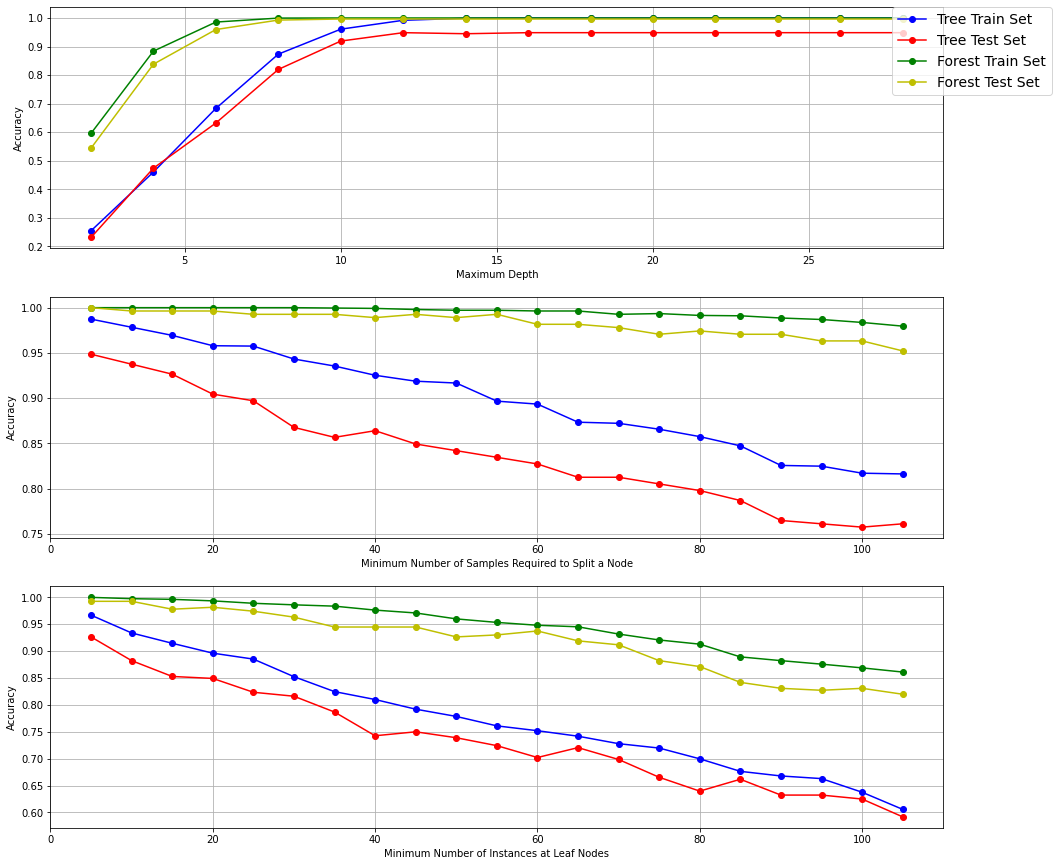

In [134]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.set_size_inches(16, 6)
ax1.plot(range(2, 30, 2), max_depth_train_acc_tree, "bo-", label='Tree Train Set')
ax1.plot(range(2, 30, 2), max_depth_test_acc_tree , "ro-", label ='Tree Test Set')
ax1.plot(range(2, 30, 2), max_depth_train_acc_forest, "go-", label='Forest Train Set')
ax1.plot(range(2, 30, 2), max_depth_test_acc_forest , "yo-", label ='Forest Test Set')
ax1.set(xlabel="Maximum Depth", ylabel="Accuracy")
ax1.grid()

ax2.plot(range(5, 110, 5), min_samples_train_acc_tree, "bo-")
ax2.plot(range(5, 110, 5), min_samples_test_acc_tree , "ro-")
ax2.plot(range(5, 110, 5), min_samples_train_acc_forest, "go-")
ax2.plot(range(5, 110, 5), min_samples_test_acc_forest , "yo-")
ax2.set(xlabel="Minimum Number of Samples Required to Split a Node", ylabel="Accuracy")
ax2.grid()

ax3.plot(range(5, 110, 5), min_instances_train_acc_tree, "bo-")
ax3.plot(range(5, 110, 5), min_instances_test_acc_tree, "ro-")
ax3.plot(range(5, 110, 5), min_instances_train_acc_forest, "go-")
ax3.plot(range(5, 110, 5), min_instances_test_acc_forest, "yo-")
ax3.set(xlabel="Minimum Number of Instances at Leaf Nodes", ylabel="Accuracy")
ax3.grid()

fig.legend(fontsize=14)
fig.subplots_adjust(bottom=0, top=1.9)
plt.show()


As the number of minimum number of instances per leaf node increases, the model gets better at generalizing to unseen data (i.e., accuracy on train and test datasets near identical). Somewhat the opposite with the minimum number of samples required to split a node (at least at the lower end), the model is unable to distinguish some edge cases? <br>

Over-fitting much less of an issue in random forests - makes sense, since biases from individual trees in a forest are offset by majority voting. 

## 3.4. Increase Test Set by 30%

### Create the New Test Dataset

In [135]:
# split the existing train test into 70/30 train/test datasets
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [136]:
# add the original test set to the new test set
X_test_30 = np.concatenate((X_test_30, X_test), axis=0)
y_test_30 = np.concatenate((y_test_30, y_test), axis=0)


### Fit the Model

In [137]:
tree_clf_30 = DecisionTreeClassifier(max_depth=12, random_state=42)
tree_clf_30.fit(X_train_30, y_train_30)

forest_clf_30 = RandomForestClassifier(max_depth=12, random_state=42)
forest_clf_30.fit(X_train_30, y_train_30)

RandomForestClassifier(max_depth=12, random_state=42)

### Find the Accuracy

#### Method for Plotting Confusion Matrices

In [138]:
def plot_confusion_matrix(y_train, y_test, y_train_pred, y_test_pred, labels):
    cm_train = confusion_matrix(y_train, y_train_pred, labels=labels)
    cm_test = confusion_matrix(y_test, y_test_pred, labels=labels)

    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=labels)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=labels)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    disp_train.plot(ax=axes[0])
    axes[0].set_title('Tree Train Set')
    disp_test.plot(ax=axes[1])
    axes[1].set_title('Tree Test Set')

    plt.show()

#### Accuracy 

Tree Train Accuracy: 0.9836544074722708
Tree Test Accuracy: 0.8997020854021847
Forest Train Accuracy: 1.0
Forest Test Accuracy: 0.9950347567030785


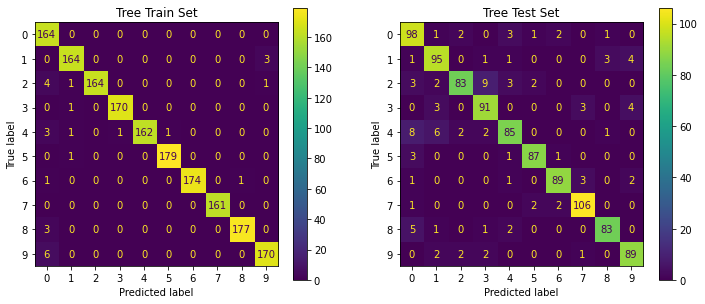

In [139]:
train_pred_30 = tree_clf_30.predict(X_train_30)
accuracy_train_set_30 = accuracy_score(train_pred_30, y_train_30)
test_pred_30 = tree_clf_30.predict(X_test_30)
accuracy_test_set_30 = accuracy_score(test_pred_30, y_test_30)

forest_train_pred_30 = forest_clf_30.predict(X_train_30)
forest_accuracy_train_set_30 = accuracy_score(forest_train_pred_30, y_train_30)
forest_test_pred_30 = forest_clf_30.predict(X_test_30)
forest_accuracy_test_set_30 = accuracy_score(forest_test_pred_30, y_test_30)

trees_accuracy['Tree_Train_set_30'] = accuracy_train_set_30
trees_accuracy['Tree_Test_set_30'] = accuracy_test_set_30
trees_accuracy['Forest_Train_set_30'] = forest_accuracy_train_set_30
trees_accuracy['Forest_Test_set_30'] = forest_accuracy_test_set_30

print('Tree Train Accuracy: {}'.format(accuracy_train_set_30))
print('Tree Test Accuracy: {}'.format(accuracy_test_set_30))
print('Forest Train Accuracy: {}'.format(forest_accuracy_train_set_30))
print('Forest Test Accuracy: {}'.format(forest_accuracy_test_set_30))
plot_confusion_matrix(y_train_30, y_test_30, train_pred_30, test_pred_30, tree_clf_30.classes_)

## 3.5. Increase Test Set by 60%

### Create the Test Dataset

In [140]:
# split the existing train test into 70/30 train/test datasets
X_train_60, X_test_60, y_train_60, y_test_60 = train_test_split(X_train, y_train, test_size=0.6, random_state=0)

In [141]:
# add the original test set to the new test set
X_test_60 = np.concatenate((X_test_60, X_test), axis=0)
y_test_60 = np.concatenate((y_test_60, y_test), axis=0)

### Fit the Model

In [142]:
tree_clf_60 = DecisionTreeClassifier(max_depth=12, random_state=42)
tree_clf_60.fit(X_train_60, y_train_60)

forest_clf_60 = RandomForestClassifier(max_depth=12, random_state=42)
forest_clf_60.fit(X_train_60, y_train_60)

RandomForestClassifier(max_depth=12, random_state=42)

### Find the Accuracy

Tree Train Accuracy: 0.9805924412665986
Tree Test Accuracy: 0.8839747271682941
Forest Train Accuracy: 1.0
Forest Test Accuracy: 0.9919586444572085


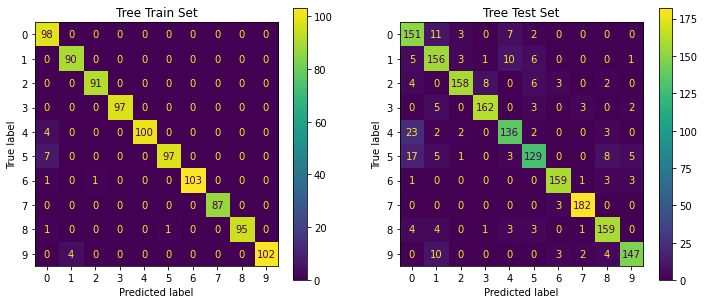

In [143]:
train_pred_60 = tree_clf_60.predict(X_train_60)
accuracy_train_set_60 = accuracy_score(train_pred_60, y_train_60)
test_pred_60 = tree_clf_60.predict(X_test_60)
accuracy_test_set_60 = accuracy_score(test_pred_60, y_test_60)

forest_train_pred_60 = forest_clf_60.predict(X_train_60)
forest_accuracy_train_set_60 = accuracy_score(forest_train_pred_60, y_train_60)
forest_test_pred_60 = forest_clf_60.predict(X_test_60)
forest_accuracy_test_set_60 = accuracy_score(forest_test_pred_60, y_test_60)

trees_accuracy['Tree_Train_set_60'] = accuracy_train_set_60
trees_accuracy['Tree_Test_set_60'] = accuracy_test_set_60
trees_accuracy['Forest_Train_set_60'] = forest_accuracy_train_set_60
trees_accuracy['Forest_Test_set_60'] = forest_accuracy_test_set_60

print('Tree Train Accuracy: {}'.format(accuracy_train_set_60))
print('Tree Test Accuracy: {}'.format(accuracy_test_set_60))
print('Forest Train Accuracy: {}'.format(forest_accuracy_train_set_60))
print('Forest Test Accuracy: {}'.format(forest_accuracy_test_set_60))
plot_confusion_matrix(y_train_60, y_test_60, train_pred_60, test_pred_60, tree_clf_60.classes_)

## Summary

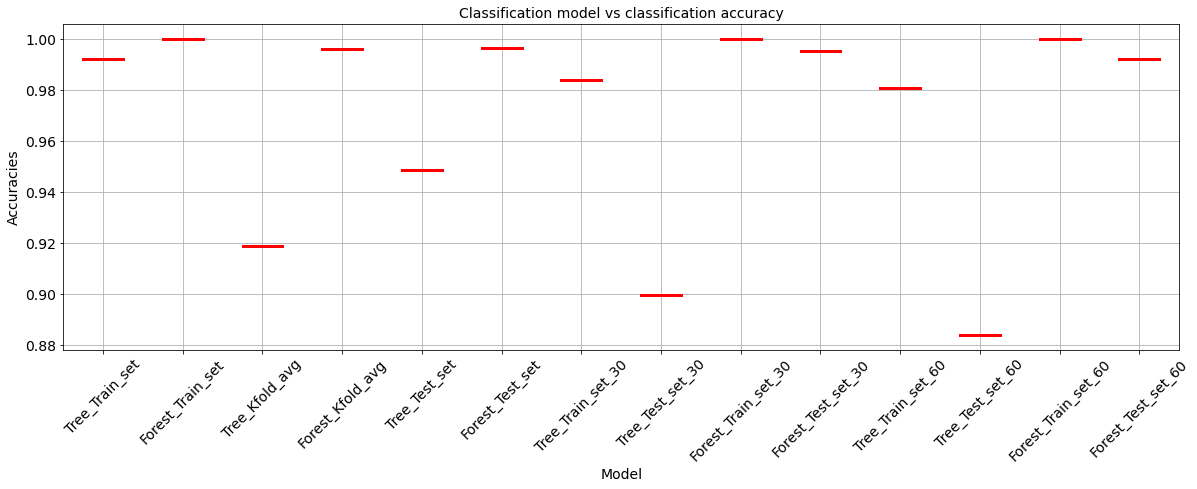

In [144]:
boxplot = trees_accuracy.boxplot(figsize=(20, 6), boxprops=dict(linestyle='-', linewidth=2), showfliers=False, grid=True, rot=45, 
             flierprops=dict(linestyle='-', linewidth=1.5),
             medianprops=dict(linestyle='-', linewidth=3, color='red'),
             whiskerprops=dict(linestyle='-', linewidth=1.5),
             capprops=dict(linestyle='-', linewidth=1.5), fontsize=14)
boxplot.set_ylabel("Accuracies", fontsize=14)
boxplot.set_xlabel("Model", fontsize=14)
boxplot.set_title("Classification model vs classification accuracy", fontsize=14)
plt.show()

Random forest much more imune to overfitting, more evident as the training dataset is reduced/ test set expanded.

# Part 4: Neural Networks

## Setup

### Import the libraries

In [16]:
import sys
import os
import cv2
import sklearn
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import metrics
from tensorflow.keras import models

from imageio import imread
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split,  KFold

from sklearn.linear_model import LinearRegression
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

# for plotting figures/ data visualisation 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

### Get the data

In [32]:
ds1 = os.listdir("resized1")
ds2 = os.listdir("resized2")
ds3 = os.listdir("resized3")
def to_array(train, labels, data, path):
    for i, im in enumerate(data):
        filename = path + im    
        image = np.asarray(imread(filename), dtype=None) # convert the image to an array
        train.append(image) 
        labels.append(0 if im.split(".")[0] == "a" # labels are determined by the name of the image
                      else 1 if im.split(".")[0] == "b" 
                      else 2 if im.split(".")[0] == "c" 
                      else 3 if im.split(".")[0] == "d" 
                      else 4 if im.split(".")[0] == "e" 
                      else 5 if im.split(".")[0] == "f" 
                      else 6 if im.split(".")[0] == "g" 
                      else 7 if im.split(".")[0] == "h" 
                      else 8 if im.split(".")[0] == "i" 
                      else 9)
labels1, labels2, labels3, train1, train2, train3 = [], [], [], [], [], []

ds1.remove(".DS_Store")
ds2.remove(".DS_Store")
ds3.remove(".DS_Store")

to_array(train1, labels1, ds1, 'resized1/')
to_array(train2, labels2, ds2, 'resized2/')
to_array(train3, labels3, ds3, 'resized3/')
# flatten the data (images are in the form of 1D arrays)
train1 = np.array(train1)
train2 = np.array(train2)
train3 = np.array(train3)
train1 = train1.reshape(len(train1), 25*25)
train2 = train2.reshape(len(train2), 25*25)
train3 = train3.reshape(len(train3), 25*25)
# flip the colour scheme of the second dataset
rgb = np.full((len(train2),len(train2[0])), 255)
# reverse the colour scheme by subtracting each pixel value from 255
train2 = np.subtract(rgb,train2) 
# combine the three datasets together
label_c = np.concatenate((labels1, labels2, labels3), axis=0)
train = np.concatenate((train1, train2, train3), axis=0)
# normalize values in the range 0 to 1
train = train / 255
blur = []
for i in range(len(train)):
    blur.append(cv2.GaussianBlur(train[i], (5, 5), 0)) 

In [33]:
train_c = np.array(blur)
train_c = train.reshape(train_c.shape[0], train_c.shape[1])
key_c = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(train_c, label_c, test_size=0.1, random_state=0)
X_train_full_process, X_test_full_process, y_train_full_process, y_test_full_process = train_test_split(train_c, label_c, test_size=0.2, random_state=0)

## 4.1. Logistic Regression 

### Setup the model

In [20]:
lr_accuracy = pd.DataFrame()

In [21]:
lin_reg = sklearn.linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

### Test the Model

#### On the train dataset

In [22]:
lr_train_pred = lin_reg.predict(X_train)
lr_train_acc = r2_score(y_train, lr_train_pred)
lr_accuracy["Train Dataset"] = [lr_train_acc]
print(lr_train_acc)

0.9205687676719758


#### Using 10-fold cross validation 

In [23]:
def cross_validate(X, y, k, model):

    kf = KFold(n_splits=k)
    kf_accuracy = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        predicted = model.predict(X_test)

        acc = r2_score(predicted, y_test)
        kf_accuracy.append(acc)
    
    avg_kf_accuracy = sum(kf_accuracy)/k
    return avg_kf_accuracy

In [24]:
lr_kfold_acc = cross_validate(X_train, y_train, 10, lin_reg)
print(lr_kfold_acc)
lr_accuracy["10-fold Validation"] = [lr_kfold_acc]

0.7881856965010187


#### Using the test dataset

In [25]:
lr_test_pred = lin_reg.predict(X_test)
lr_test_acc = r2_score(y_test, lr_test_pred)
lr_accuracy["Test Dataset"] = [lr_test_acc]
print(lr_test_acc)

0.6652699495043706


### Compare the Results

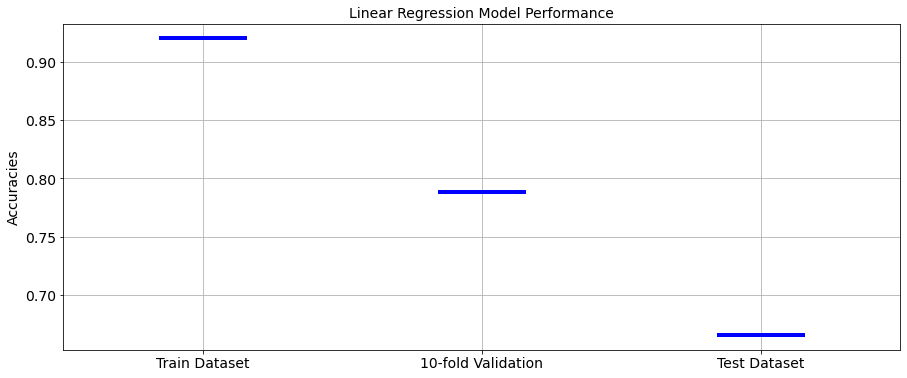

In [26]:
boxplot = lr_accuracy.boxplot(figsize=(15, 6), boxprops=dict(linestyle='-', linewidth=2), showfliers=False, grid=True, rot=0, 
             flierprops=dict(linestyle='-', linewidth=1.5),
             medianprops=dict(linestyle='-', linewidth=4, color='blue'),
             whiskerprops=dict(linestyle='-', linewidth=1.5),
             capprops=dict(linestyle='-', linewidth=1.5), fontsize=14)
boxplot.set_ylabel("Accuracies", fontsize=14)
boxplot.set_title("Linear Regression Model Performance", fontsize=14)
plt.show()

The dataset is somewhat linearly separable but the model visibly is overfitting to the training data and does not generalise well to the test dataset.

## 4.2 Multilayer Perceptron 

### Setup

In [50]:
# nodes per layer is an array of integers equal to the number of layers, each integer denotes the number of nodes in the layer equal to element index+1
def MP_model(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, 
    nr_hidden_layers=2, 
    nodes_per_layer=[16, 16, 16, 10], 
    activation_func='relu', 
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    mp_metrics=['accuracy'],  
    epochs=50,
    learning_rate=0.1,
    return_model=False):

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(625,)))
    model.add(tf.keras.layers.Dense(nodes_per_layer[0], input_shape=(625,)))

    for i in range(nr_hidden_layers):
        model.add(tf.keras.layers.Dense(nodes_per_layer[i+1], activation=activation_func)) 
    model.add(tf.keras.layers.Dense(nodes_per_layer[-1], activation='softmax'))
    
    if optimizer is None:
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        opt=optimizer
    
    model.compile(optimizer=opt, loss=loss, metrics=mp_metrics)

    model.fit(X_train, y_train, epochs=epochs)

    if (return_model == True):
        return model

    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    return train_loss, train_acc, test_loss, test_acc

In [28]:
def plot_metrics(train_loss, test_loss, train_accuracy, test_accuracy, title, labels, xlabel):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 6)

    width = 0.35
    ind = np.arange(len(train_loss))
    ax1.bar(ind, train_loss, width=width, color = 'b', label='Train')
    ax1.bar(ind+width, test_loss, width=width, color = 'g', label='Test')
    ax1.set_xticks(ind + width / 2)
    ax1.set_ylabel('Loss', fontsize=14)
    ax1.set_xticklabels(labels, fontsize=14)
    ax1.grid()

    ax2.bar(ind, train_accuracy, width=width, color = 'b')
    ax2.bar(ind+width, test_accuracy, width=width, color = 'g')
    ax2.set_xticks(ind + width / 2)
    ax2.set_ylabel('Accuracy', fontsize=14)
    ax2.set_xticklabels(labels, fontsize=14)
    ax2.grid()

    fig.legend(fontsize=14)
    fig.suptitle(title, fontsize=16)
    fig.supxlabel(xlabel, fontsize=16)
    plt.show()

### Experiments

#### 1. Different Activation Functions 

##### Run the Model

In [29]:
activation_funcs = ['sigmoid', 'tanh', 'softsign', 'relu']
af_train_loss, af_train_acc, af_test_loss, af_test_acc = np.zeros(len(activation_funcs)), np.zeros(len(activation_funcs)), np.zeros(len(activation_funcs)), np.zeros(len(activation_funcs))

for i in range(len(activation_funcs)):
    func_train_loss, func_train_acc, func_test_loss, func_test_acc = MP_model(X_train, y_train, X_test, y_test, activation_func=activation_funcs[i])
    af_train_loss[i] = func_train_loss
    af_train_acc[i] = func_train_acc
    af_test_loss[i] = func_test_loss
    af_test_acc[i] = func_test_acc

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
77/77 [==============================] - 0s 530us/step - loss: 2.3098 - accuracy: 0.0993
Epoch 2/50
77/77 [==============================] - 0s 614us/step - loss: 2.2751 - accuracy: 0.1558
Epoch 3/50
77/77 [==============================] - 0s 386us/step - loss: 2.2423 - accuracy: 0.2442
Epoch 4/50
77/77 [==============================] - 0s 358us/step 

##### Visualise Results

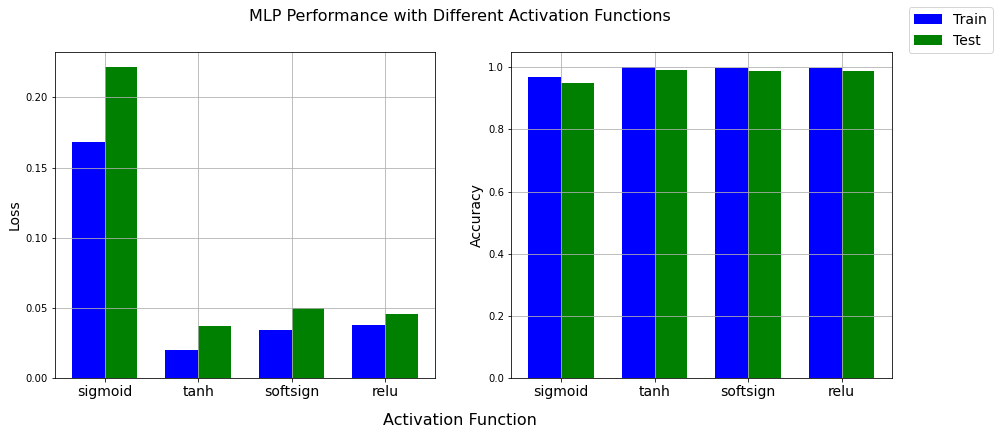

In [30]:
plot_metrics(af_train_loss, af_test_loss, af_train_acc, af_test_acc, 'MLP Performance with Different Activation Functions', activation_funcs, 'Activation Function')

Expected to see Sigmoid under-performing - suffers from vanishing/ exploding gradients.

#### 2. Different Number of Layers

##### Run the Model

In [31]:
nr_hidden_layers = [1, 2, 3, 5, 7, 9, 11]

nh_train_loss, nh_train_acc, nh_test_loss, nh_test_acc = np.zeros(len(nr_hidden_layers)), np.zeros(len(nr_hidden_layers)), np.zeros(len(nr_hidden_layers)), np.zeros(len(nr_hidden_layers))

for i in range(len(nr_hidden_layers)):
    nr_nodes = np.append(np.ones(nr_hidden_layers[i]+1) * 50, 10)
    layer_train_loss, layer_train_acc, layer_test_loss, layer_test_acc = MP_model(X_train, y_train, X_test, y_test, nr_hidden_layers=nr_hidden_layers[i], nodes_per_layer=nr_nodes)
    nh_train_loss[i] = layer_train_loss
    nh_train_acc[i] = layer_train_acc
    nh_test_loss[i] = layer_test_loss
    nh_test_acc[i] = layer_test_acc

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
77/77 [==============================] - 0s 424us/step - loss: 2.3200 - accuracy: 0.1525
Epoch 2/50
77/77 [==============================] - 0s 366us/step - loss: 1.8287 - accuracy: 0.3652
Epoch 3/50
77/77 [==============================] - 0s 356us/step - loss: 1.4597 - accuracy: 0.5006
Epoch 4/50
77/77 [==============================] - 0s 352us/step 

##### Visualise Results

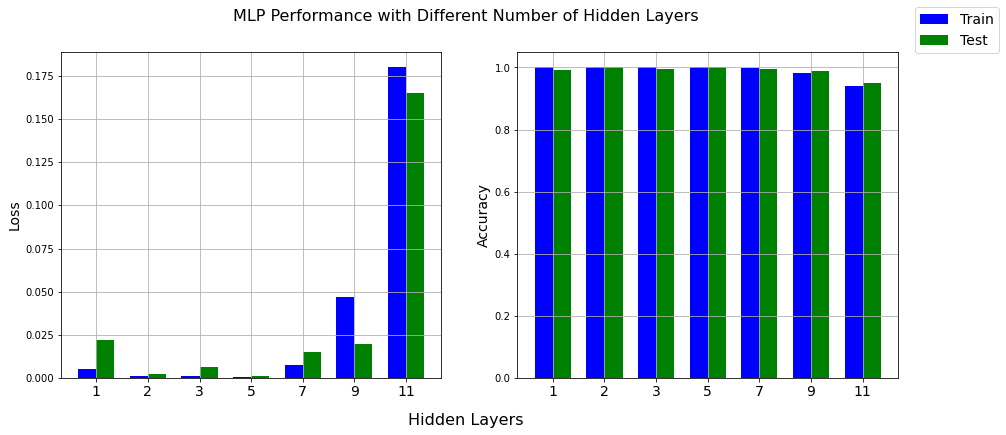

In [32]:
plot_metrics(nh_train_loss, nh_test_loss, nh_train_acc, nh_test_acc, 'MLP Performance with Different Number of Hidden Layers', nr_hidden_layers, 'Hidden Layers')

Performance decreases as the number of hidden layers increases - with the given number of epochs (50 by default) is not sufficient for weight updates propagate through the more complex networks. An ANN with a single hidden layer may be too simplistic, hence the decreased performance when compared to an ANN with 2 hidden layers.

#### 3. Different Number of Nodes 

##### Run the Model

In [33]:
nr_nodes = [10, 25, 50, 75, 100]

nn_train_loss, nn_train_acc, nn_test_loss, nn_test_acc = np.zeros(len(nr_nodes)), np.zeros(len(nr_nodes)), np.zeros(len(nr_nodes)), np.zeros(len(nr_nodes))

for i in range(len(nr_nodes)):
    nr_nodes_per_layer = np.append(np.ones(3) * nr_nodes[i], 10)
    nodes_train_loss, nodes_train_acc, nodes_test_loss, nodes_test_acc = MP_model(X_train, y_train, X_test, y_test, nodes_per_layer=nr_nodes_per_layer)
    nn_train_loss[i] = nodes_train_loss
    nn_train_acc[i] = nodes_train_acc
    nn_test_loss[i] = nodes_test_loss
    nn_test_acc[i] = nodes_test_acc

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
77/77 [==============================] - 0s 408us/step - loss: 2.3141 - accuracy: 0.1044
Epoch 2/50
77/77 [==============================] - 0s 351us/step - loss: 2.2375 - accuracy: 0.1560
Epoch 3/50
77/77 [==============================] - 0s 344us/step - loss: 2.1633 - accuracy: 0.2382
Epoch 4/50
77/77 [==============================] - 0s 342us/step 

##### Visualise Results

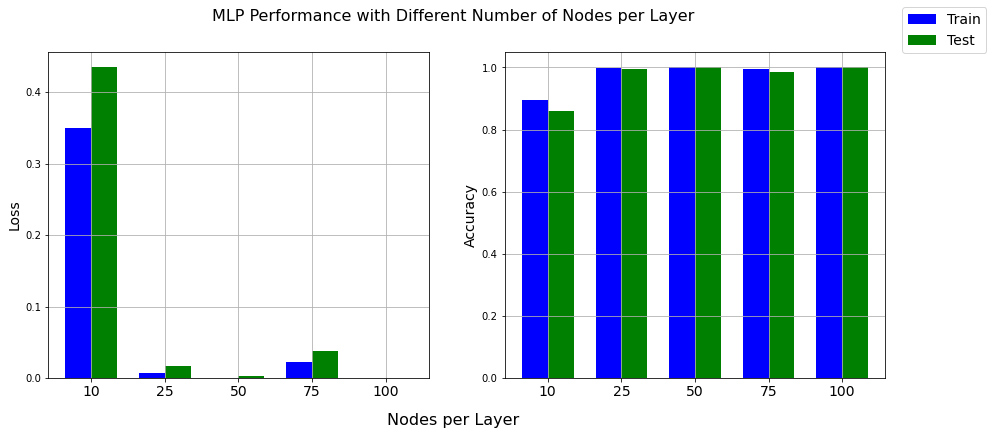

In [34]:
plot_metrics(nn_train_loss, nn_test_loss, nn_train_acc, nn_test_acc, 'MLP Performance with Different Number of Nodes per Layer', nr_nodes, 'Nodes per Layer')

Having more nodes per layer makes the ANN more robust/ quicker to train.

#### 4. Different Learning Rates

##### Run the Model

In [35]:
alphas = [0.0001, 0.0005, 0.001, 0.005, 0.008, 0.01]

a_train_loss, a_train_acc, a_test_loss, a_test_acc = np.zeros(len(alphas)), np.zeros(len(alphas)), np.zeros(len(alphas)), np.zeros(len(alphas))

for i in range(len(alphas)):
    alpha_train_loss, alpha_train_acc, alpha_test_loss, alpha_test_acc = MP_model(X_train, y_train, X_test, y_test, optimizer=None, learning_rate=alphas[i])
    a_train_loss[i] = alpha_train_loss
    a_train_acc[i] = alpha_train_acc
    a_test_loss[i] = alpha_test_loss
    a_test_acc[i] = alpha_test_acc

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
77/77 [==============================] - 0s 414us/step - loss: 2.2959 - accuracy: 0.0992
Epoch 2/50
77/77 [==============================] - 0s 355us/step - loss: 2.2310 - accuracy: 0.1398
Epoch 3/50
77/77 [==============================] - 0s 345us/step - loss: 2.2073 - accuracy: 0.1702
Epoch 4/50
77/77 [==============================] - 0s 342us/step 

##### Visualise the Results

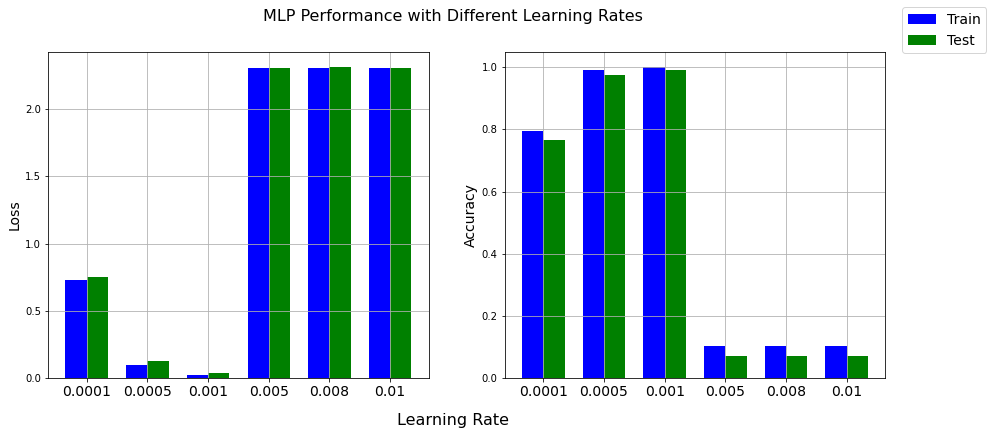

In [36]:
plot_metrics(a_train_loss, a_test_loss, a_train_acc, a_test_acc, 'MLP Performance with Different Learning Rates', alphas, 'Learning Rate')

Default learning rate for Adam optimizer is 0.001 (used as the default optimizer whenever the optimizer is not explicitly defined), hence tried using alpha values within that range. The default value seems to be the most optimal option for this problem, worse results with a very small learning rate are likely due to learning-slowdown (need more epochs to train the model), while a model with a larger learning rate is under-performing due to the gradient overshooting the local optima (Adam optimizer is based on gradient descent).

#### 5. Different Optimizers 

##### Run the Model

In [37]:
optmizers = ['Adam', 'SGD', 'Adagrad', 'Adamax', 'RMSprop']

o_train_loss, o_train_acc, o_test_loss, o_test_acc = np.zeros(len(optmizers)), np.zeros(len(optmizers)), np.zeros(len(optmizers)), np.zeros(len(optmizers))

for i in range(len(optmizers)):
    op_train_loss, op_train_acc, op_test_loss, op_test_acc = MP_model(X_train, y_train, X_test, y_test, optimizer=optmizers[i])
    o_train_loss[i] = op_train_loss
    o_train_acc[i] = op_train_acc
    o_test_loss[i] = op_test_loss
    o_test_acc[i] = op_test_acc

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
77/77 [==============================] - 0s 411us/step - loss: 2.2863 - accuracy: 0.1480
Epoch 2/50
77/77 [==============================] - 0s 360us/step - loss: 2.1107 - accuracy: 0.2609
Epoch 3/50
77/77 [==============================] - 0s 354us/step - loss: 1.8178 - accuracy: 0.3752
Epoch 4/50
77/77 [==============================] - 0s 343us/step 

##### Visualise the Results

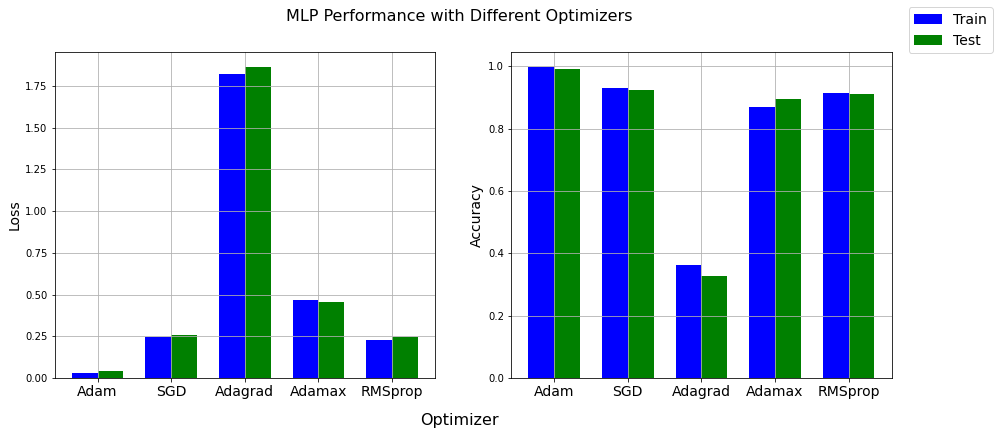

In [38]:
plot_metrics(o_train_loss, o_test_loss, o_train_acc, o_test_acc, 'MLP Performance with Different Optimizers', optmizers, 'Optimizer')

Adagrad is not under-performing due to slow learning (increasing the number of epochs improves the performance for all other optimizers except Adagrad). Adagrad has adaptive parameter-specific learning rates - perhaps get stuck in a local optima/ overshoots the global optima.

### Visualise Predictions

#### Methods

In [54]:
X_train_reshaped = X_train.reshape(2448, 25, 25)
X_test_reshaped = X_test.reshape(272, 25, 25)

In [39]:

def plot_value_array(i, predictions_array, true_label):
    
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [40]:
def plot_image(i, predictions_array, true_label, img):
    
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(key_c[predicted_label],
                                100*np.max(predictions_array),
                                key_c[true_label]),
                                color=color)

#### Get the Model

In [55]:
ann_model = MP_model(return_model=True)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
77/77 [==============================] - 0s 457us/step - loss: 2.2843 - accuracy: 0.1282
Epoch 2/50
77/77 [==============================] - 0s 403us/step - loss: 2.1174 - accuracy: 0.2347
Epoch 3/50
77/77 [==============================] - 0s 429us/step - loss: 1.8806 - accuracy: 0.3386
Epoch 4/50
77/77 [==============================] - 0s 409us/step 

#### Predict

In [56]:
classifications = ann_model.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


#### Visualise

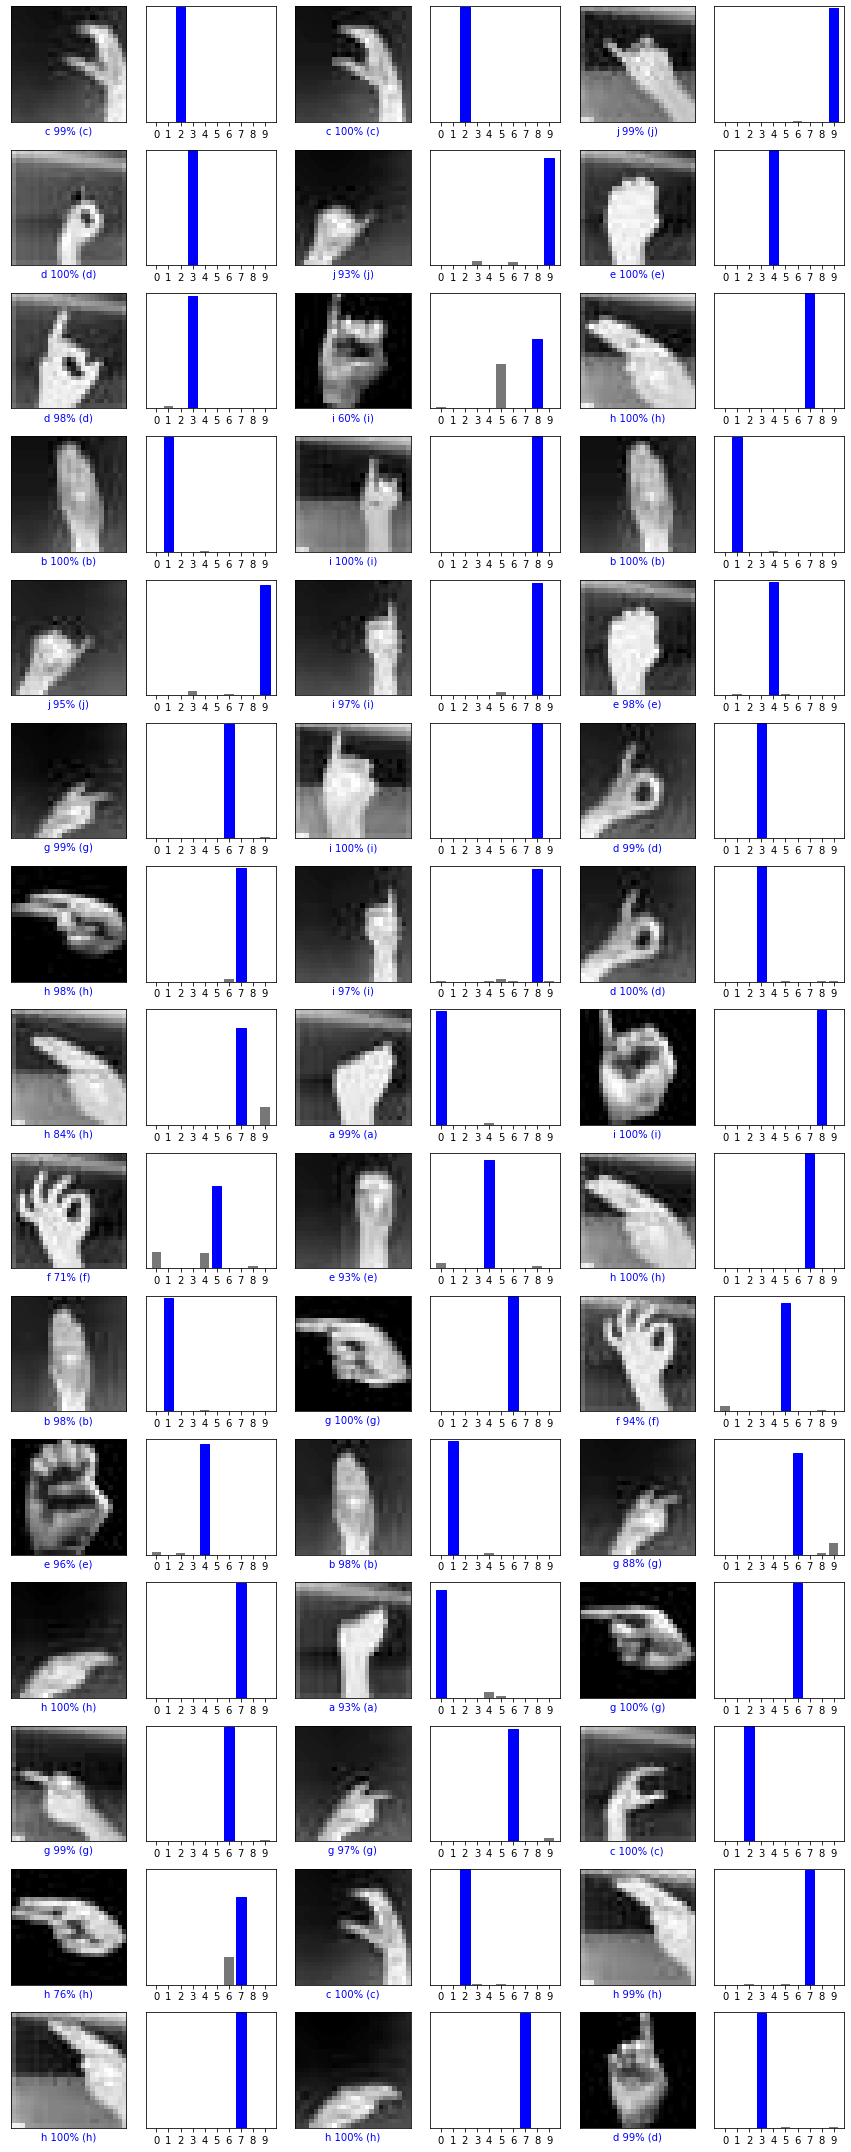

In [57]:
num_rows = 15
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, classifications[i], y_test, X_test_reshaped)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, classifications[i], y_test)
plt.tight_layout()
plt.show()

## 4.3 Convolutional Neural Network 

### Setup

In [42]:
x_train = X_train.reshape(2448, 25, 25, 1)
x_test = X_test.reshape(272, 25, 25, 1)

In [43]:
cnn_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(25, 25, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 23, 23, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_134 (Dense)            (None, 128)               131200    
_________________________________________________________________
dense_135 (Dense)            (None, 10)              

### Fit the Model

#### Fit

In [44]:
cnn_model.fit(x_train, y_train, epochs=5)
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test,  y_test, verbose=0)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
77/77 [==============================] - 1s 6ms/step - loss: 2.2137 - accuracy: 0.1989
Epoch 2/5
77/77 [==============================] - 0s 6ms/step - loss: 1.0692 - accuracy: 0.6618
Epoch 3/5
77/77 [==============================] - 0s 6ms/step - loss: 0.3388 - accuracy: 0.9102
Epoch 4/5
77/77 [==============================] - 0s 6ms/step - loss: 0.12

#### Find Accuracy

In [45]:
print('\nTest accuracy:', cnn_test_acc)


Test accuracy: 0.9926470518112183


### Visualise the Layers

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


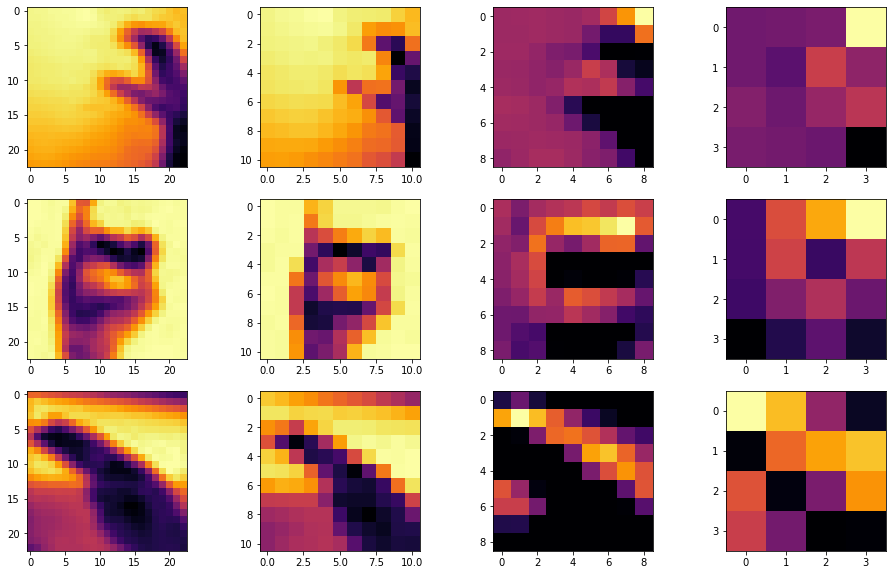

In [46]:
f, axarr = plt.subplots(3,4, figsize=(16,10))
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in cnn_model.layers]
activation_model = tf.keras.models.Model(inputs = cnn_model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 25, 25, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 25, 25, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 25, 25, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

# Part 5: Research

Undo the normalising and observe the effect on model accuracy.
Image pre-processing has a substantial impact in generating a robust classifier <br>
Research question: What effect does data (image) pre-processing have on Convolutional Neural Network's performance? <br>
Hypothesis: Datasets with fewer features will outperform 

## Setup

In [1]:
import sys
import os
import cv2
import time
import sklearn
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import metrics
from tensorflow.keras import models

from imageio import imread
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split,  KFold

from sklearn.linear_model import LinearRegression
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

# for plotting figures/ data visualisation 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Prepare the Datasets

#### Methods

In [3]:
# saved in the same directory as the Jupyter notebook
ds1 = os.listdir('original1')
ds2 = os.listdir('original2')
ds3 = os.listdir('original3')
ds1.remove(".DS_Store") # folder meta-data file inlcuded in Mac OS folders by defualt 
ds2.remove(".DS_Store")
ds3.remove(".DS_Store")

In [4]:
def gray_resize(input_path, output_path, data, size, grayscale=True):
    for im in data:
        image = Image.open(input_path + im)
        resized = image.resize((size,size))
        if grayscale == True:
            gray = resized.convert('L')# convert to grayscale to reduce noise
            gray.save(output_path + im) # save the resized images in the 'resized' directory
        else:
            resized.save(output_path + im)
        
             

In [5]:
def to_array(train, labels, data, path):
    for i, im in enumerate(data):
        filename = path + im    
        image = np.asarray(imread(filename), dtype=None) # convert the image to an array
        train.append(image) 
        labels.append(0 if im.split(".")[0] == "a" # labels are determined by the name of the image
                      else 1 if im.split(".")[0] == "b" 
                      else 2 if im.split(".")[0] == "c" 
                      else 3 if im.split(".")[0] == "d" 
                      else 4 if im.split(".")[0] == "e" 
                      else 5 if im.split(".")[0] == "f" 
                      else 6 if im.split(".")[0] == "g" 
                      else 7 if im.split(".")[0] == "h" 
                      else 8 if im.split(".")[0] == "i" 
                      else 9)

In [6]:
def image_prep(dir1, dir2, dir3, blur=False):
    ds1_full = os.listdir(dir1)
    ds2_full = os.listdir(dir2)
    ds3_full = os.listdir(dir3)

    labels1_full, labels2_full, labels3_full, train1_full, train2_full, train3_full = [], [], [], [], [], []

    to_array(train1_full, labels1_full, ds1_full, '{}/'.format(dir1))
    to_array(train2_full, labels2_full, ds2_full, '{}/'.format(dir2))
    to_array(train3_full, labels3_full, ds3_full, '{}/'.format(dir3))

    labels_full = np.concatenate((labels1_full, labels2_full, labels3_full), axis=0)
    train_full = np.concatenate((train1_full, train2_full, train3_full), axis=0)

    train_full = train_full / 255
    if blur == True:
        blur = []
        for i in range(len(train_full)):
            blur.append(cv2.GaussianBlur(train_full[i], (5, 5), 0))
        train_full = np.array(blur)

    X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(train_full, labels_full, test_size=0.2, random_state=0)

    return X_train_full, X_test_full, y_train_full, y_test_full
    

In [7]:
# for easy tranlation between a label of an image and it menaing 
key = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'] 

### 1. Full Size (Full Colour)

In [8]:
gray_resize('original1/','resized1_large/', ds1, 400, grayscale=False)
gray_resize('original2/','resized2_large/', ds2, 400, grayscale=False)
gray_resize('original3/','resized3_large/', ds3, 400, grayscale=False)

In [8]:
X_train_full, X_test_full, y_train_full, y_test_full = image_prep('resized1_large', 'resized2_large', 'resized3_large')

In [9]:
x_train_full = X_train_full.reshape(2176, 400, 400, 3)
x_test_full = X_test_full.reshape(544, 400, 400, 3)

### 2. Full Size (Gray Scale)

In [29]:
gray_resize('original1/','resized1_large_gray/', ds1, 400)
gray_resize('original2/','resized2_large_gray/', ds2, 400)
gray_resize('original3/','resized3_large_gray/', ds3, 400)

In [10]:
X_train_full_gray, X_test_full_gray, y_train_full_gray, y_test_full_gray = image_prep('resized1_large_gray', 'resized2_large_gray', 'resized3_large_gray')

In [11]:
x_train_full_gray = X_train_full_gray.reshape(2176, 400, 400, 1)
x_test_full_gray = X_test_full_gray.reshape(544, 400, 400, 1)

### 3. Reduced Number of Features (Full Colour)

In [8]:
gray_resize('original1/','resized1_med/', ds1, 50, grayscale=False)
gray_resize('original2/','resized2_med/', ds2, 50, grayscale=False)
gray_resize('original3/','resized3_med/', ds3, 50, grayscale=False)

In [12]:
X_train_med, X_test_med, y_train_med, y_test_med = image_prep('resized1_med', 'resized2_med', 'resized3_med')

In [13]:
x_train_med = X_train_med.reshape(2176, 50, 50, 3)
x_test_med = X_test_med.reshape(544, 50, 50, 3)

### 4. Reduced Number of Features (Gray Scale)

In [11]:
gray_resize('original1/','resized1_med_gray/', ds1, 50)
gray_resize('original2/','resized2_med_gray/', ds2, 50)
gray_resize('original3/','resized3_med_gray/', ds3, 50)

In [14]:
X_train_med_gray, X_test_med_gray, y_train_med_gray, y_test_med_gray = image_prep('resized1_med_gray', 'resized2_med_gray', 'resized3_med_gray')

In [15]:
x_train_med_gray = X_train_med_gray.reshape(2176, 50, 50, 1)
x_test_med_gray = X_test_med_gray.reshape(544, 50, 50, 1)

### 5. Gaussian Blurring (Full Size)

In [15]:
gray_resize('original1/','resized1_full_gaus/', ds1, 400)
gray_resize('original2/','resized2_full_gaus/', ds2, 400)
gray_resize('original3/','resized3_full_gaus/', ds3, 400)

In [16]:
X_train_full_gaus, X_test_full_gaus, y_train_full_gaus, y_test_full_gaus = image_prep('resized1_full_gaus', 'resized2_full_gaus', 'resized3_full_gaus', blur=True)

In [17]:
x_train_full_gaus = X_train_full_gaus.reshape(2176, 400, 400, 1)
x_test_full_gaus = X_test_full_gaus.reshape(544, 400, 400, 1)

### 6. Gaussian Blurring (Reduced Size)

In [23]:
gray_resize('original1/','resized1_med_gaus/', ds1, 50)
gray_resize('original2/','resized2_med_gaus/', ds2, 50)
gray_resize('original3/','resized3_med_gaus/', ds3, 50)

In [18]:
X_train_med_gaus, X_test_med_gaus, y_train_med_gaus, y_test_med_gaus = image_prep('resized1_med_gaus', 'resized2_med_gaus', 'resized3_med_gaus', blur=True)

In [19]:
x_train_med_gaus = X_train_med_gaus.reshape(2176, 50, 50, 1)
x_test_med_gaus = X_test_med_gaus.reshape(544, 50, 50, 1)

## Test

#### Model Setup

In [21]:
# input_shape should be in the form input_shape = (25, 25, 1)
def get_CNN(input_shape):
    cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
    cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return cnn_model


In [22]:
research_acc = pd.DataFrame()
research_loss = pd.DataFrame()
research_ttime = pd.DataFrame()

#### Full Size (Full Colour)

In [23]:
cnn_full_size_colour = get_CNN((400, 400, 3))
full_colour_start_time = time.time()
cnn_full_size_colour.fit(x_train_full, y_train_full, epochs=5)
full_colour_ttime = time.time() - full_colour_start_time

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
68/68 [==============================] - 341s 5s/step - loss: 3.0160 - accuracy: 0.4160
Epoch 2/5
68/68 [==============================] - 344s 5s/step - loss: 0.0939 - accuracy: 0.9758
Epoch 3/5
68/68 [==============================] - 540s 8s/step - loss: 0.0297 - accuracy: 0.9885
Epoch 4/5
68/68 [==============================] - 321s 5s/step - loss: 

In [24]:
cnn_train_loss_full, cnn_train_acc_full = cnn_full_size_colour.evaluate(x_train_full,  y_train_full, verbose=0)
cnn_test_loss_full, cnn_test_acc_full = cnn_full_size_colour.evaluate(x_test_full,  y_test_full, verbose=0)

research_acc["Full Size & Colour (Train)"] = [cnn_train_acc_full]
research_acc["Full Size & Colour (Test)"] =  [cnn_test_acc_full]
research_loss["Full Size & Colour (Train)"] = [cnn_train_loss_full]
research_loss["Full Size & Colour (Test)"] = [cnn_test_loss_full]
research_ttime["Full Size & Colour"] = [full_colour_ttime]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


#### Full Size (Gray Scale)

In [45]:
cnn_full_size_gray = get_CNN((400, 400, 1))
full_gray_start_time = time.time()
cnn_full_size_gray.fit(x_train_full_gray, y_train_full_gray, epochs=5)
full_gray_ttime = time.time() - full_gray_start_time

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
68/68 [==============================] - 340s 5s/step - loss: 4.0701 - accuracy: 0.2857
Epoch 2/5
68/68 [==============================] - 345s 5s/step - loss: 0.2219 - accuracy: 0.9386
Epoch 3/5
68/68 [==============================] - 340s 5s/step - loss: 0.0650 - accuracy: 0.9880
Epoch 4/5
68/68 [==============================] - 352s 5s/step - loss: 

In [46]:
cnn_train_loss_gray, cnn_train_acc_gray = cnn_full_size_gray.evaluate(x_train_full_gray,  y_train_full_gray, verbose=0)
cnn_test_loss_gray, cnn_test_acc_gray = cnn_full_size_gray.evaluate(x_test_full_gray,  y_test_full_gray, verbose=0)
research_acc["Full Size & Gray (Train)"] = [cnn_train_acc_gray]
research_acc["Full Size & Gray (Test)"] =  [cnn_test_acc_gray]
research_loss["Full Size & Gray (Train)"] = [cnn_train_loss_gray]
research_loss["Full Size & Gray (Test)"] = [cnn_test_loss_gray]
research_ttime["Full Size & Gray"] = [full_gray_ttime]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


#### Reduced Number of Features (Full Colour)

In [25]:
cnn_med_size_colour = get_CNN((50, 50, 3))
med_colour_start_time = time.time()
cnn_med_size_colour.fit(x_train_med, y_train_med, epochs=5)
med_colour_ttime = time.time() - med_colour_start_time

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
68/68 [==============================] - 2s 23ms/step - loss: 1.8112 - accuracy: 0.4038
Epoch 2/5
68/68 [==============================] - 2s 23ms/step - loss: 0.1406 - accuracy: 0.9573
Epoch 3/5
68/68 [==============================] - 2s 23ms/step - loss: 0.0473 - accuracy: 0.9940
Epoch 4/5
68/68 [==============================] - 2s 24ms/step - loss: 

In [26]:
cnn_train_loss_med, cnn_train_acc_med = cnn_med_size_colour.evaluate(x_train_med,  y_train_med, verbose=0)
cnn_test_loss_med, cnn_test_acc_med = cnn_med_size_colour.evaluate(x_test_med,  y_test_med, verbose=0)
research_acc["Reduced & Colour (Train)"] = [cnn_train_acc_med]
research_acc["Reduced & Colour (Test)"] =  [cnn_test_acc_med]
research_loss["Reduced & Colour (Train)"] = [cnn_train_loss_med]
research_loss["Reduced & Colour (Test)"] = [cnn_test_loss_med]
research_ttime["Reduced & Colour"] = [med_colour_ttime]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


#### Reduced Number of Features (Gray Scale)

In [27]:
cnn_med_size_gray = get_CNN((50, 50, 1))
med_gray_start_time = time.time()
cnn_med_size_gray.fit(x_train_med_gray, y_train_med_gray, epochs=5)
med_gray_ttime = time.time() - med_gray_start_time

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
68/68 [==============================] - 2s 32ms/step - loss: 1.8543 - accuracy: 0.3693
Epoch 2/5
68/68 [==============================] - 2s 26ms/step - loss: 0.1452 - accuracy: 0.9624
Epoch 3/5
68/68 [==============================] - 2s 24ms/step - loss: 0.0493 - accuracy: 0.9915
Epoch 4/5
68/68 [==============================] - 1s 22ms/step - loss: 

In [28]:
cnn_train_loss_gray_med, cnn_train_acc_gray_med = cnn_med_size_gray.evaluate(x_train_med_gray,  y_train_med_gray, verbose=0)
cnn_test_loss_gray_med, cnn_test_acc_gray_med = cnn_med_size_gray.evaluate(x_test_med_gray,  y_test_med_gray, verbose=0)
research_acc["Reduced & Gray (Train)"] = [cnn_train_acc_gray_med]
research_acc["Reduced & Gray (Test)"] =  [cnn_test_acc_gray_med]
research_loss["Reduced & Gray (Train)"] = [cnn_train_loss_gray_med]
research_loss["Reduced & Gray (Test)"] = [cnn_test_loss_gray_med]
research_ttime["Reduced & Gray"] = [med_gray_ttime]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


#### Gaussian Blurring (Full Size)

In [40]:
cnn_full_size_gaus = get_CNN((400, 400, 1))
full_gaus_start_time = time.time()
cnn_full_size_gaus.fit(x_train_full_gaus, y_train_full_gaus, epochs=5)
full_gaus_ttime = time.time() - full_gaus_start_time

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
68/68 [==============================] - 332s 5s/step - loss: 2.7712 - accuracy: 0.3124
Epoch 2/5
68/68 [==============================] - 360s 5s/step - loss: 0.2939 - accuracy: 0.9323
Epoch 3/5
68/68 [==============================] - 321s 5s/step - loss: 0.0762 - accuracy: 0.9890
Epoch 4/5
68/68 [==============================] - 657s 10s/step - loss:

In [41]:
cnn_train_loss_gaus_full, cnn_train_acc_gaus_full = cnn_full_size_gaus.evaluate(x_train_full_gaus,  y_train_full_gaus, verbose=0)
cnn_test_loss_gaus_full, cnn_test_acc_gaus_full = cnn_full_size_gaus.evaluate(x_test_full_gaus,  y_test_full_gaus, verbose=0)
research_acc["Full Size & Gaus (Train)"] = [cnn_train_acc_gaus_full]
research_acc["Full Size & Gaus (Test)"] =  [cnn_test_acc_gaus_full]
research_loss["Full Size & Gaus (Train)"] = [cnn_train_loss_gaus_full]
research_loss["Full Size & Gaus (Test)"] = [cnn_test_loss_gaus_full]
research_ttime["Full Size & Gaus"] = [full_gaus_ttime]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


#### Gaussian Blurring (Gray Scale)

In [29]:
cnn_med_size_gaus = get_CNN((50, 50, 1))
med_gaus_start_time = time.time()
cnn_med_size_gaus.fit(x_train_med_gaus, y_train_med_gaus, epochs=5)
med_gaus_ttime = time.time() - med_gaus_start_time

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
68/68 [==============================] - 2s 24ms/step - loss: 1.9531 - accuracy: 0.3207
Epoch 2/5
68/68 [==============================] - 2s 23ms/step - loss: 0.3173 - accuracy: 0.9088
Epoch 3/5
68/68 [==============================] - 2s 23ms/step - loss: 0.0542 - accuracy: 0.9923
Epoch 4/5
68/68 [==============================] - 2s 23ms/step - loss: 

In [30]:
cnn_train_loss_gaus_med, cnn_train_acc_gaus_med = cnn_med_size_gaus.evaluate(x_train_med_gaus,  y_train_med_gaus, verbose=0)
cnn_test_loss_gaus_med, cnn_test_acc_gaus_med = cnn_med_size_gaus.evaluate(x_test_med_gaus,  y_test_med_gaus, verbose=0)
research_acc["Reduced & Gaus (Train)"] = [cnn_train_acc_gaus_med]
research_acc["Reduced & Gaus (Test)"] =  [cnn_test_acc_gaus_med]
research_loss["Reduced & Gaus (Train)"] = [cnn_train_loss_gaus_med]
research_loss["Reduced & Gaus (Test)"] = [cnn_test_loss_gaus_med]
research_ttime["Reduced & Gaus"] = [med_gaus_ttime]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


#### Fully Processed Dataset

In [35]:
X_train_full_process = X_train_full_process.reshape(2176, 25, 25, 1)
X_test_full_process = X_test_full_process.reshape(544, 25, 25, 1)

cnn_full_process = get_CNN((25, 25, 1))
full_process_start_time = time.time()
cnn_full_process.fit(X_train_full_process, y_train_full_process, epochs=5)
full_process_time = time.time() - full_process_start_time

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
68/68 [==============================] - 1s 6ms/step - loss: 2.2540 - accuracy: 0.1702
Epoch 2/5
68/68 [==============================] - 0s 7ms/step - loss: 1.2626 - accuracy: 0.5865
Epoch 3/5
68/68 [==============================] - 0s 6ms/step - loss: 0.4364 - accuracy: 0.8703
Epoch 4/5
68/68 [==============================] - 0s 6ms/step - loss: 0.20

In [36]:
cnn_train_loss_full_process, cnn_train_acc_full_process = cnn_full_process.evaluate(X_train_full_process,  y_train_full_process, verbose=0)
cnn_test_loss_full_process, cnn_test_acc_full_process = cnn_full_process.evaluate(X_test_full_process,  y_test_full_process, verbose=0)
research_acc["Full Processing (Train)"] = [cnn_train_acc_full_process]
research_acc["Full Processing (Test)"] =  [cnn_test_acc_full_process]
research_loss["Full Processing (Train)"] = [cnn_train_loss_full_process]
research_loss["Full Processing (Test)"] = [cnn_test_loss_full_process]
research_ttime["Full Processing"] = [full_process_time]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


## Summary 

### Training Time

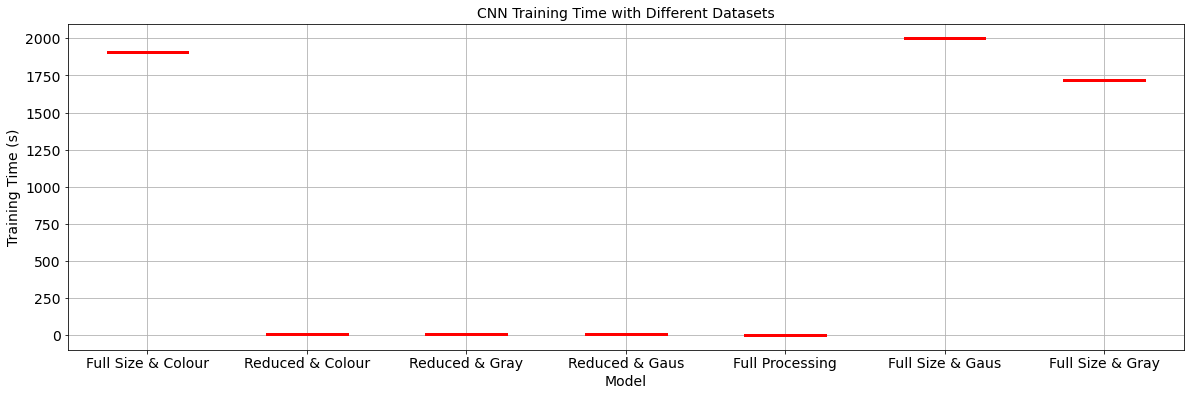

Full Size & Colour  Reduced & Colour  Reduced & Gray  Reduced & Gaus  \
0         1904.757206          8.271169        8.888498        8.098525   

   Full Processing  Full Size & Gaus  Full Size & Gray  
0         2.400083       1999.228031       1719.728682

In [52]:
boxplot = research_ttime.boxplot(figsize=(20, 6), boxprops=dict(linestyle='-', linewidth=2), showfliers=False, grid=True, rot=0, 
             flierprops=dict(linestyle='-', linewidth=1.5),
             medianprops=dict(linestyle='-', linewidth=3, color='red'),
             whiskerprops=dict(linestyle='-', linewidth=1.5),
             capprops=dict(linestyle='-', linewidth=1.5), fontsize=14)
boxplot.set_ylabel("Training Time (s)", fontsize=14)
boxplot.set_xlabel("Model", fontsize=14)
boxplot.set_title("CNN Training Time with Different Datasets", fontsize=14)
plt.show()
research_ttime.head()

### Accuracy 

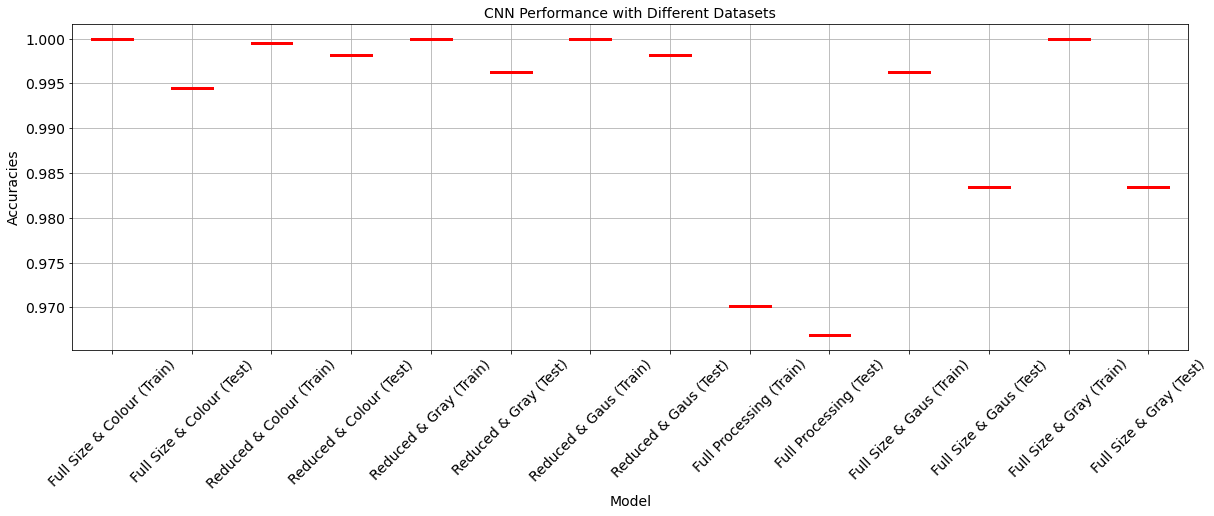

In [48]:
boxplot = research_acc.boxplot(figsize=(20, 6), boxprops=dict(linestyle='-', linewidth=2), showfliers=False, grid=True, rot=45, 
             flierprops=dict(linestyle='-', linewidth=1.5),
             medianprops=dict(linestyle='-', linewidth=3, color='red'),
             whiskerprops=dict(linestyle='-', linewidth=1.5),
             capprops=dict(linestyle='-', linewidth=1.5), fontsize=14)
boxplot.set_ylabel("Accuracies", fontsize=14)
boxplot.set_xlabel("Model", fontsize=14)
boxplot.set_title("CNN Performance with Different Datasets", fontsize=14)
plt.show()

Fully processed datasets underperforms compared to - creates a tradeoff between training time and accuracy (in which aspect is poorer performance less acceptable?). Would be interesting to see if the accuracy is persistently lower for a fully processed images even with a bigger dataset?

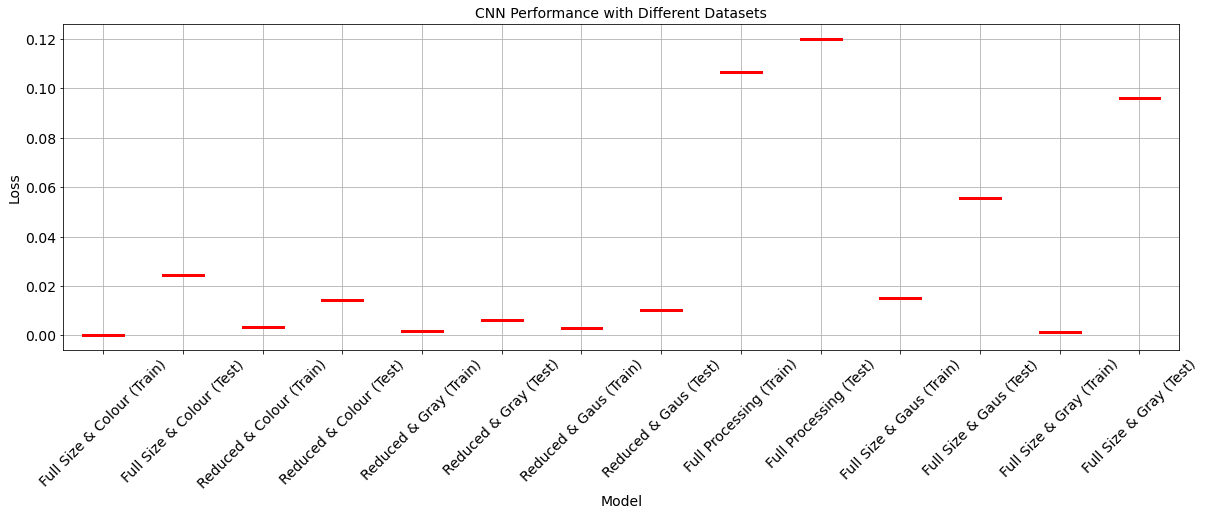

In [49]:
boxplot = research_loss.boxplot(figsize=(20, 6), boxprops=dict(linestyle='-', linewidth=2), showfliers=False, grid=True, rot=45, 
             flierprops=dict(linestyle='-', linewidth=1.5),
             medianprops=dict(linestyle='-', linewidth=3, color='red'),
             whiskerprops=dict(linestyle='-', linewidth=1.5),
             capprops=dict(linestyle='-', linewidth=1.5), fontsize=14)
boxplot.set_ylabel("Loss", fontsize=14)
boxplot.set_xlabel("Model", fontsize=14)
boxplot.set_title("CNN Performance with Different Datasets", fontsize=14)
plt.show()